<a href="https://colab.research.google.com/github/engantung/StatisticalLearning/blob/master/%5BAssignment%5D_Stock_Market_Analysis_with_R_in_GoogleColab_supervised_by_Leo_Hadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using native R on Google Colab

## Check R version

In [ ]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     

## How many CPU cores are there?

In [ ]:
library(parallel)
detectCores(all.tests = FALSE, logical = TRUE)

[1] 2

## Installing libraries

In [ ]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [ ]:
install.packages('mlbench')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




In [ ]:
install.packages('tseries') 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’




In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘urca’, ‘RcppArmadillo’




In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importing libraries

In [ ]:
#Setting up the required libraries
library(quantmod)

In [ ]:
library(tidyverse)

In [ ]:
library(TTR)

In [ ]:
library(tseries)

In [ ]:
library(forecast)

In [ ]:
library(ggplot2)

In [ ]:
library(repr)

## Change Plot Size

In [ ]:
# Change plot size to 20 x 15
options(repr.plot.width=20, repr.plot.height=15)

## Company to Research : Luluemon
Datasets taken from Yahoo Finance

In [ ]:
# Company: 
#Obtaining stock price data
ticker <- getSymbols("lulu", source="yahoo", auto.assign=FALSE,
                    return.class="xts")[,6]

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




In [ ]:
#Calculate returns
return <- diff(log(ticker))
colnames(return)  <- "return"

In [ ]:
#Trim the dataset 
return <- return["2019/"]
ticker <- ticker["2019/"]

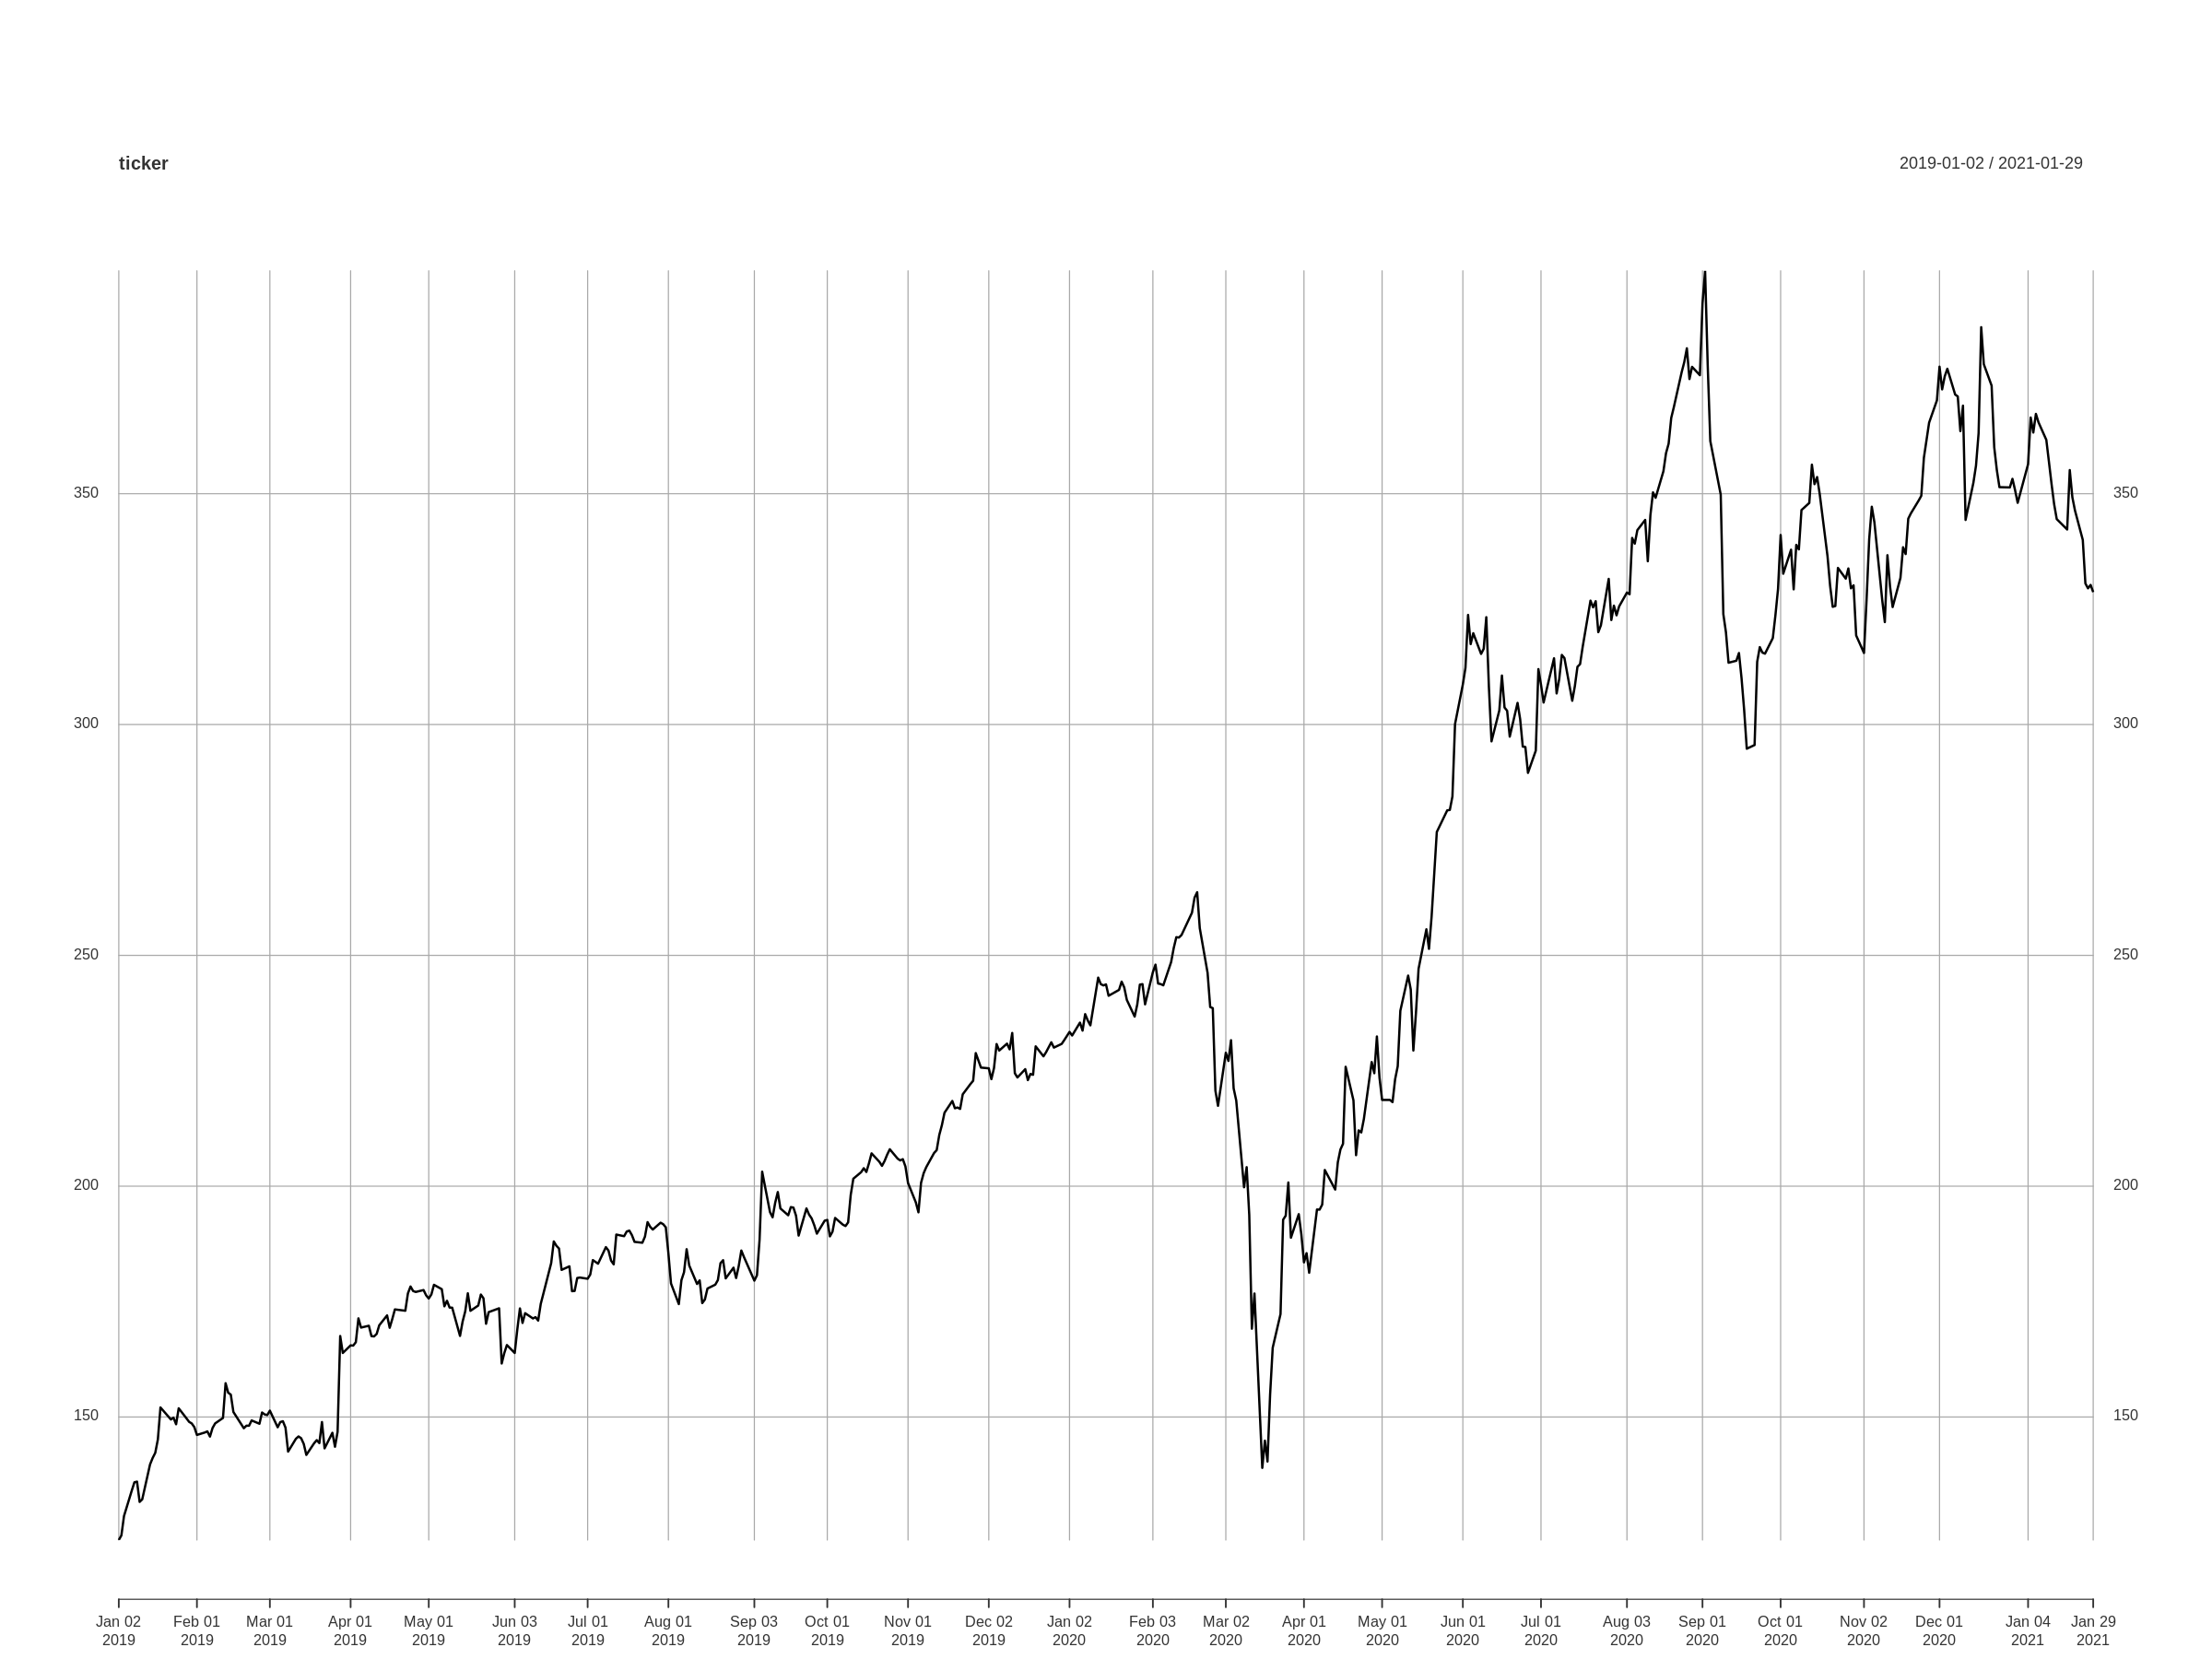

In [ ]:
plot(ticker)

## SMA, Auto ARIMA

In [ ]:
#### SMA, Auto ARIMA ################################
 df <- ts(ticker)

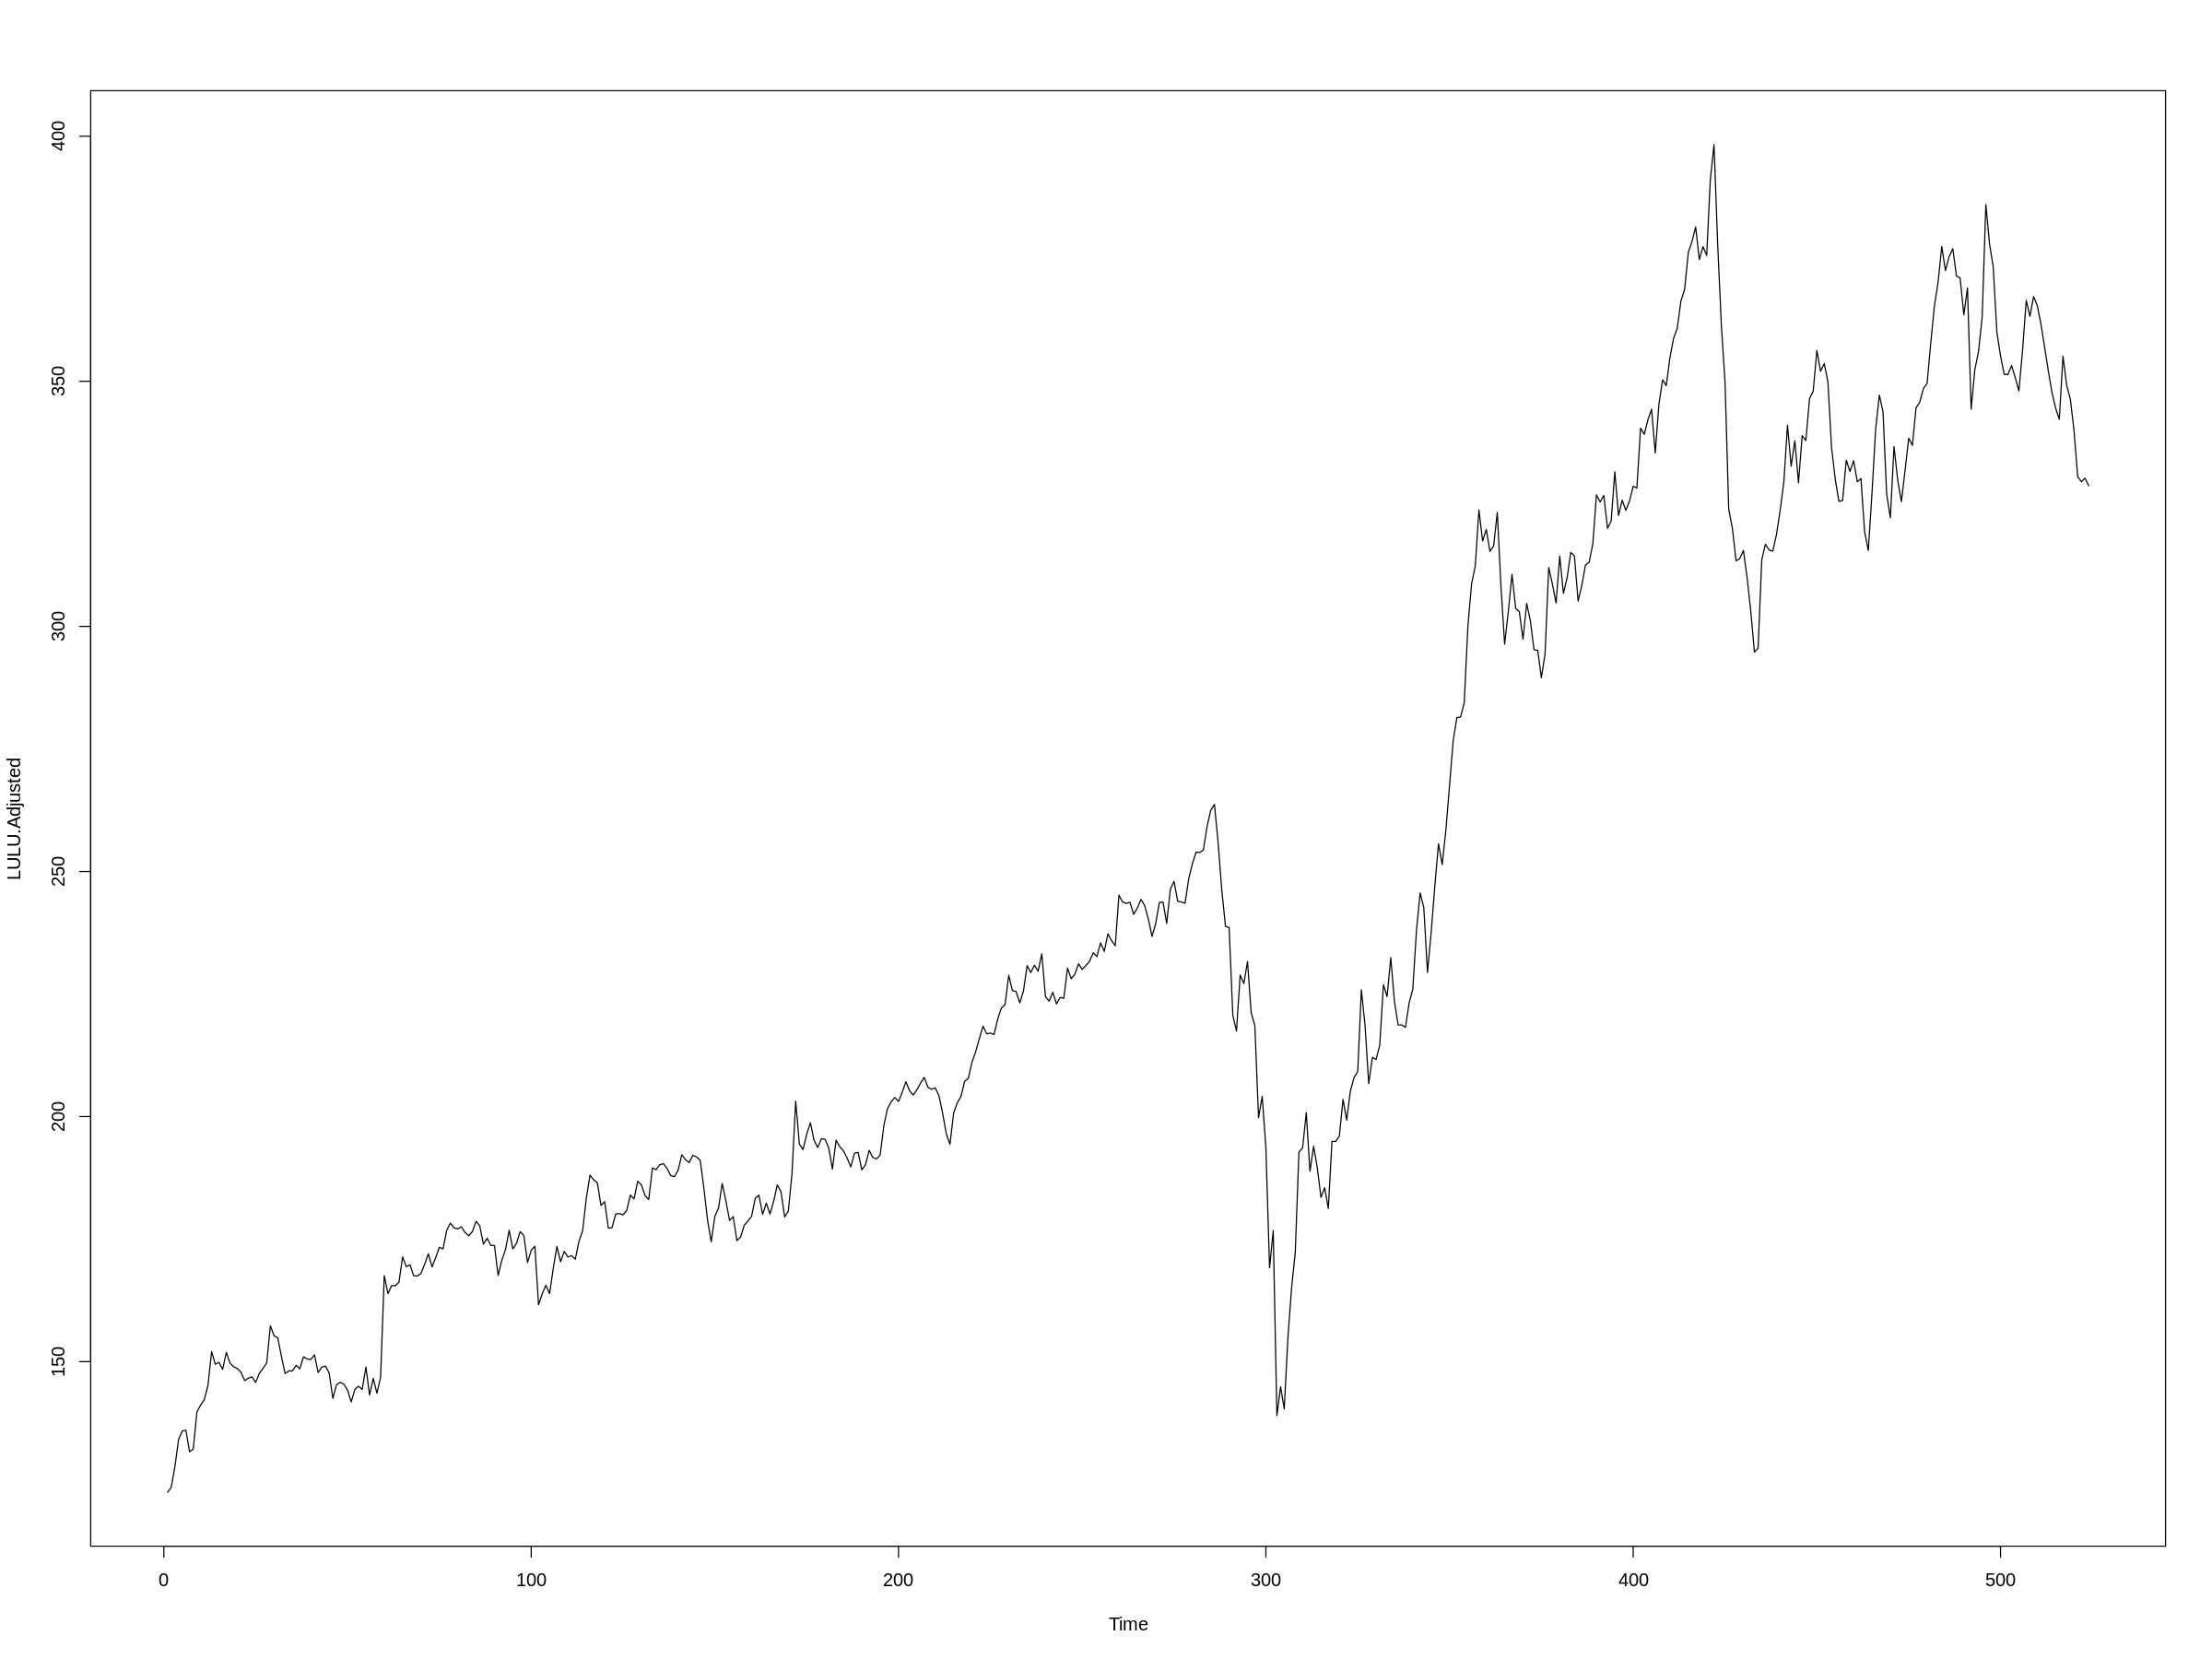

In [ ]:
plot(df)

In [ ]:
#Simple Moving Average
MA1 <- ma(df,20)
MA2 <- ma(df,50)
MA3 <- ma(df,100)
MA4 <- ma(df,200)

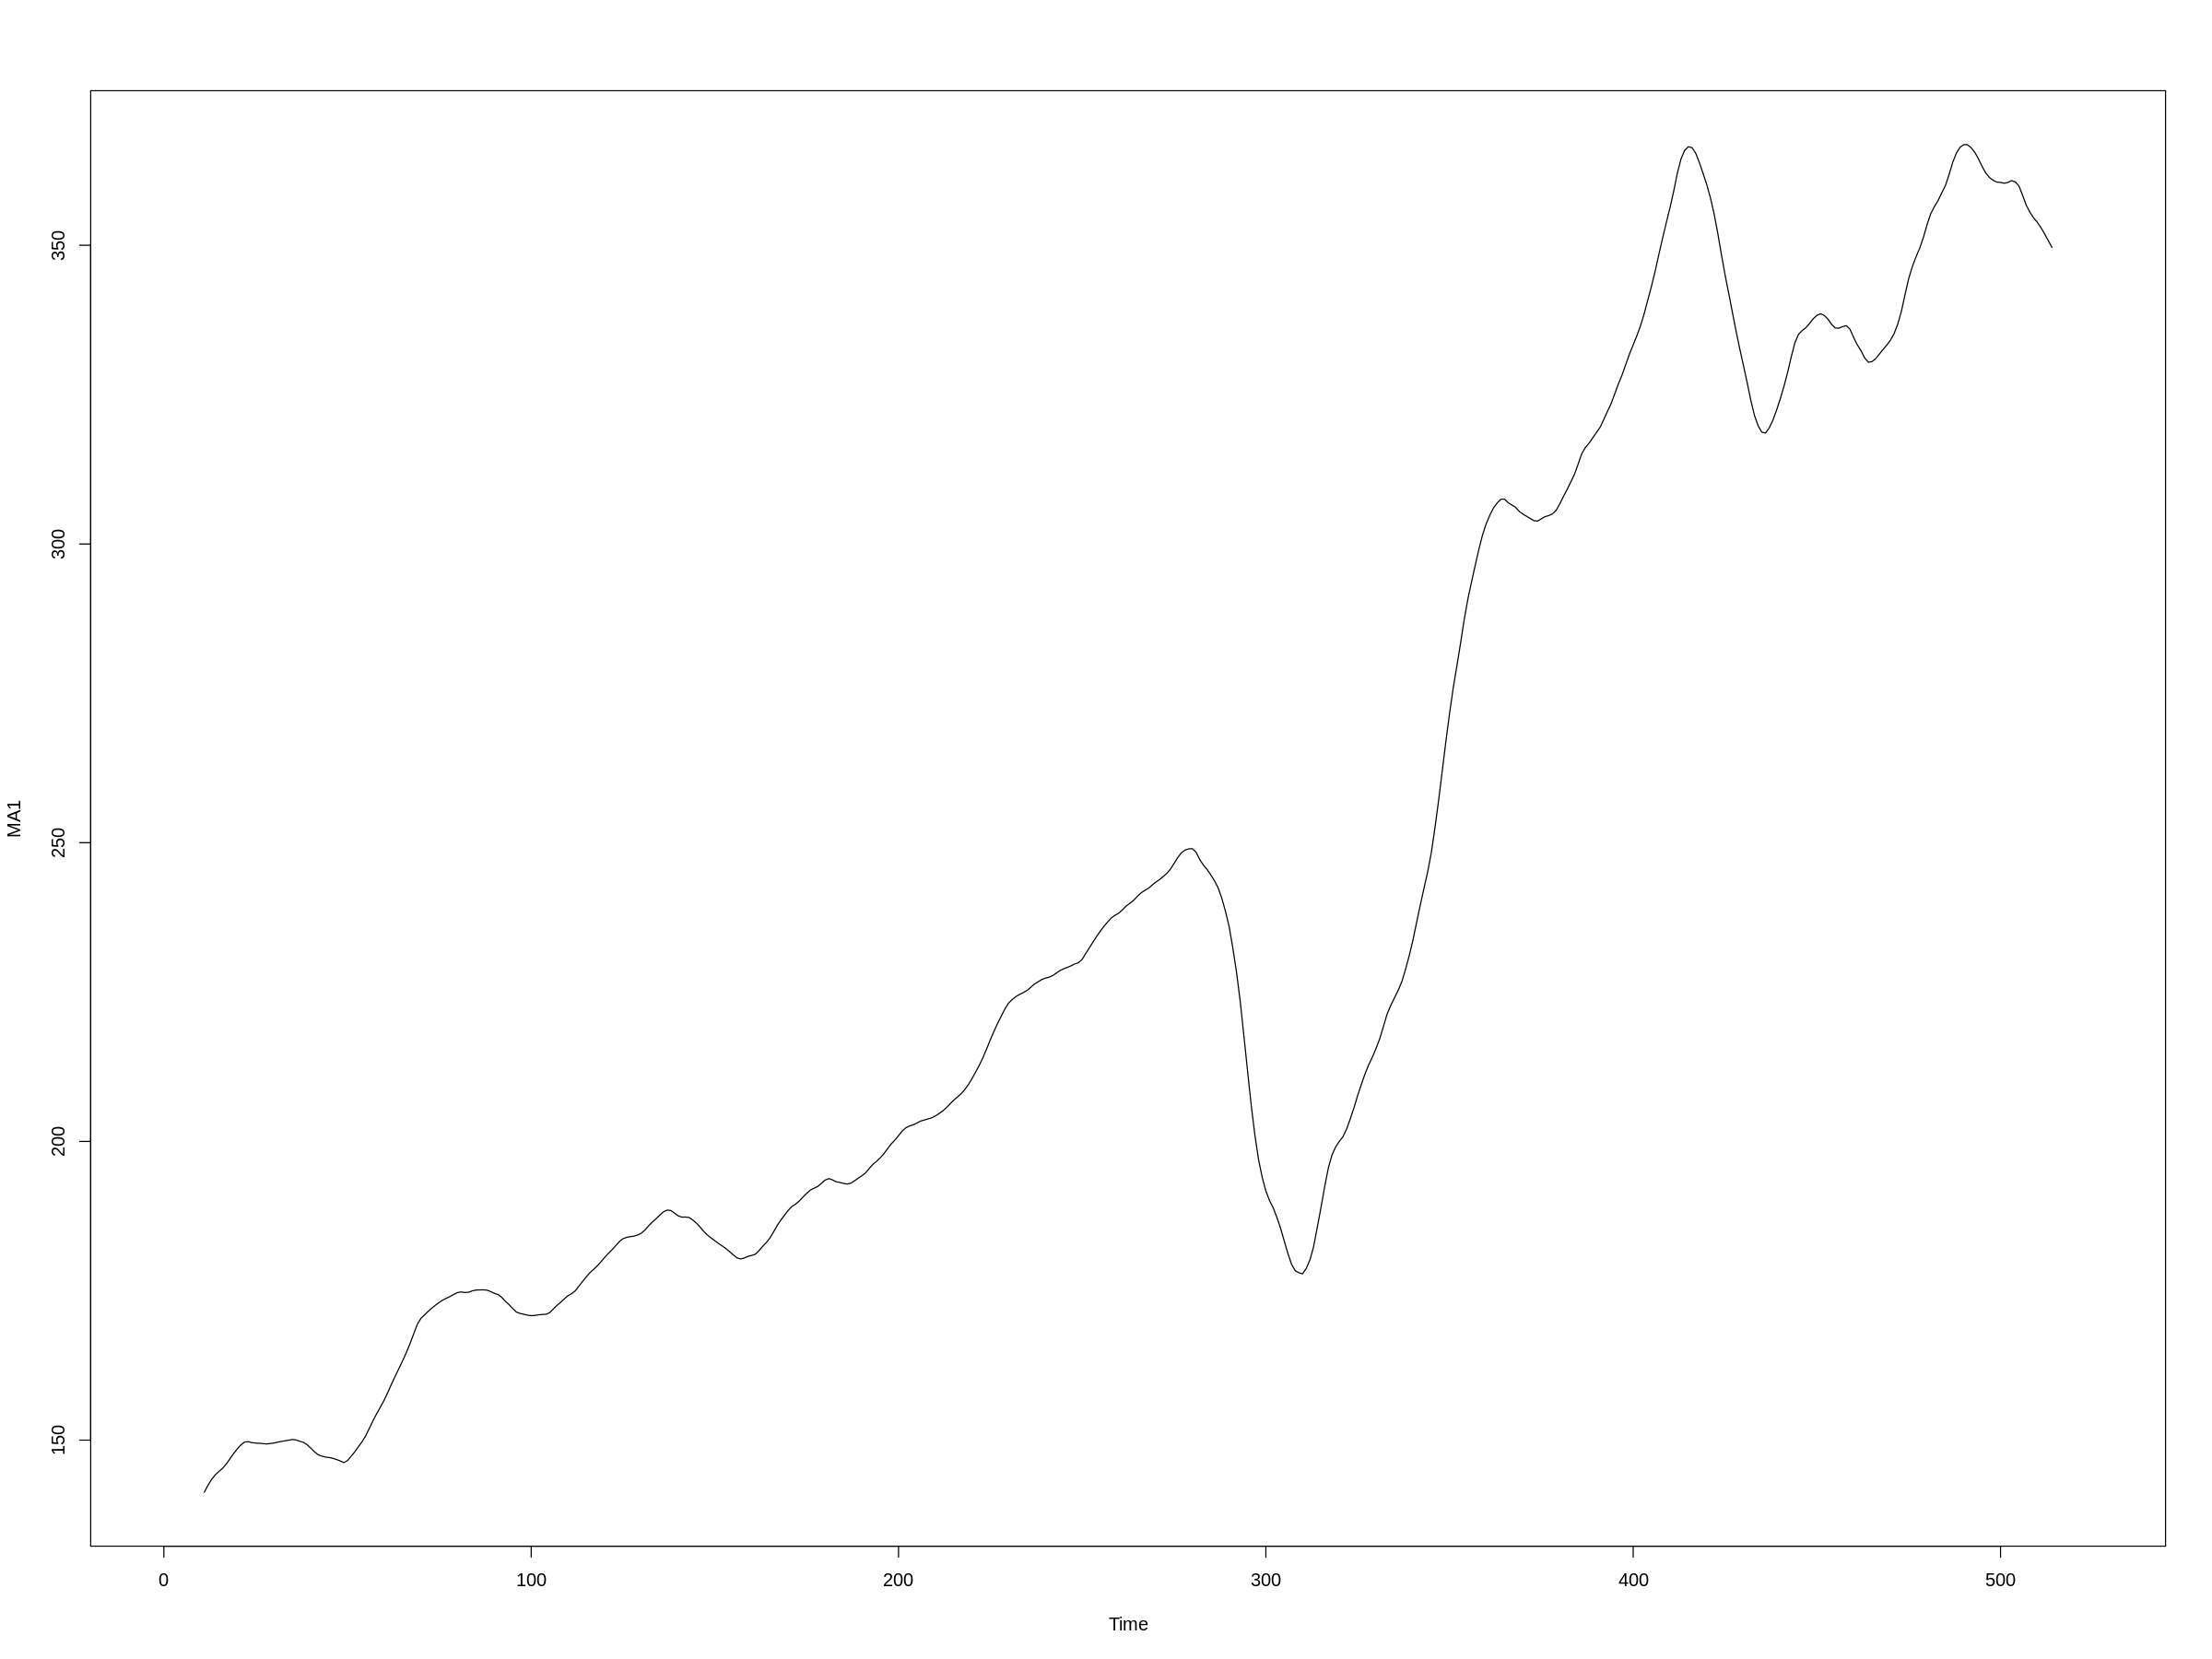

In [ ]:
plot(MA1)

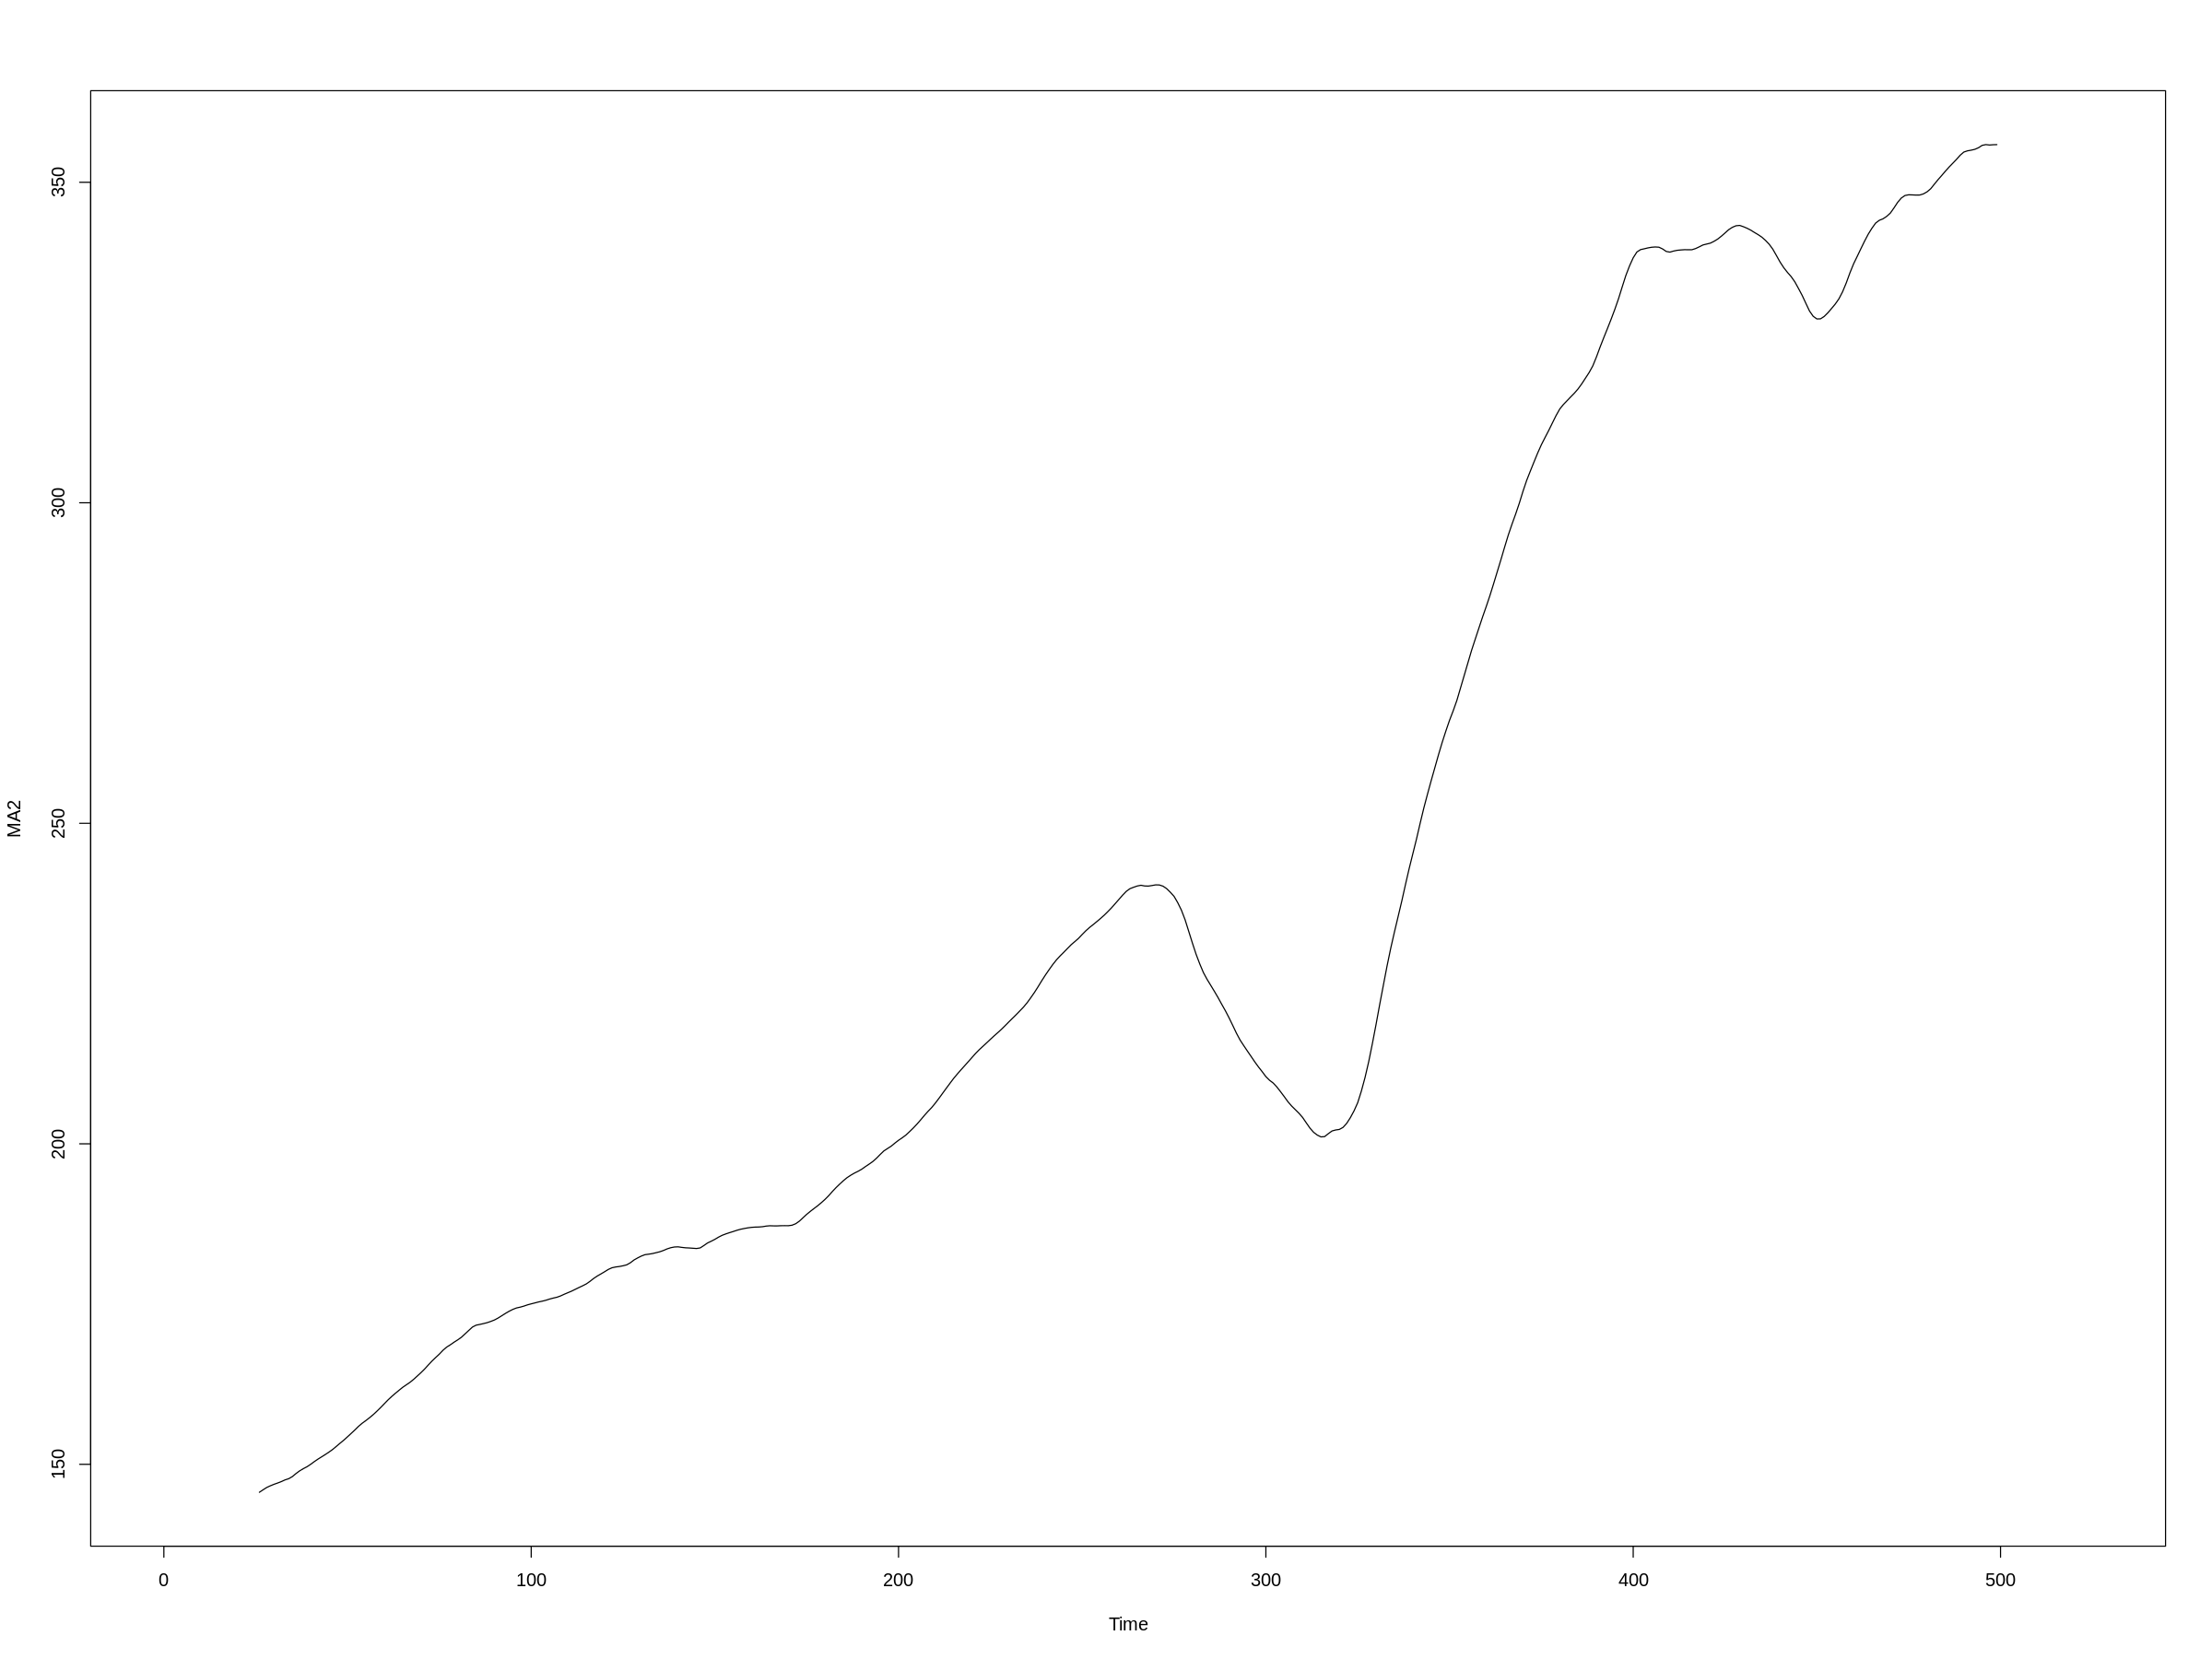

In [ ]:
plot(MA2)

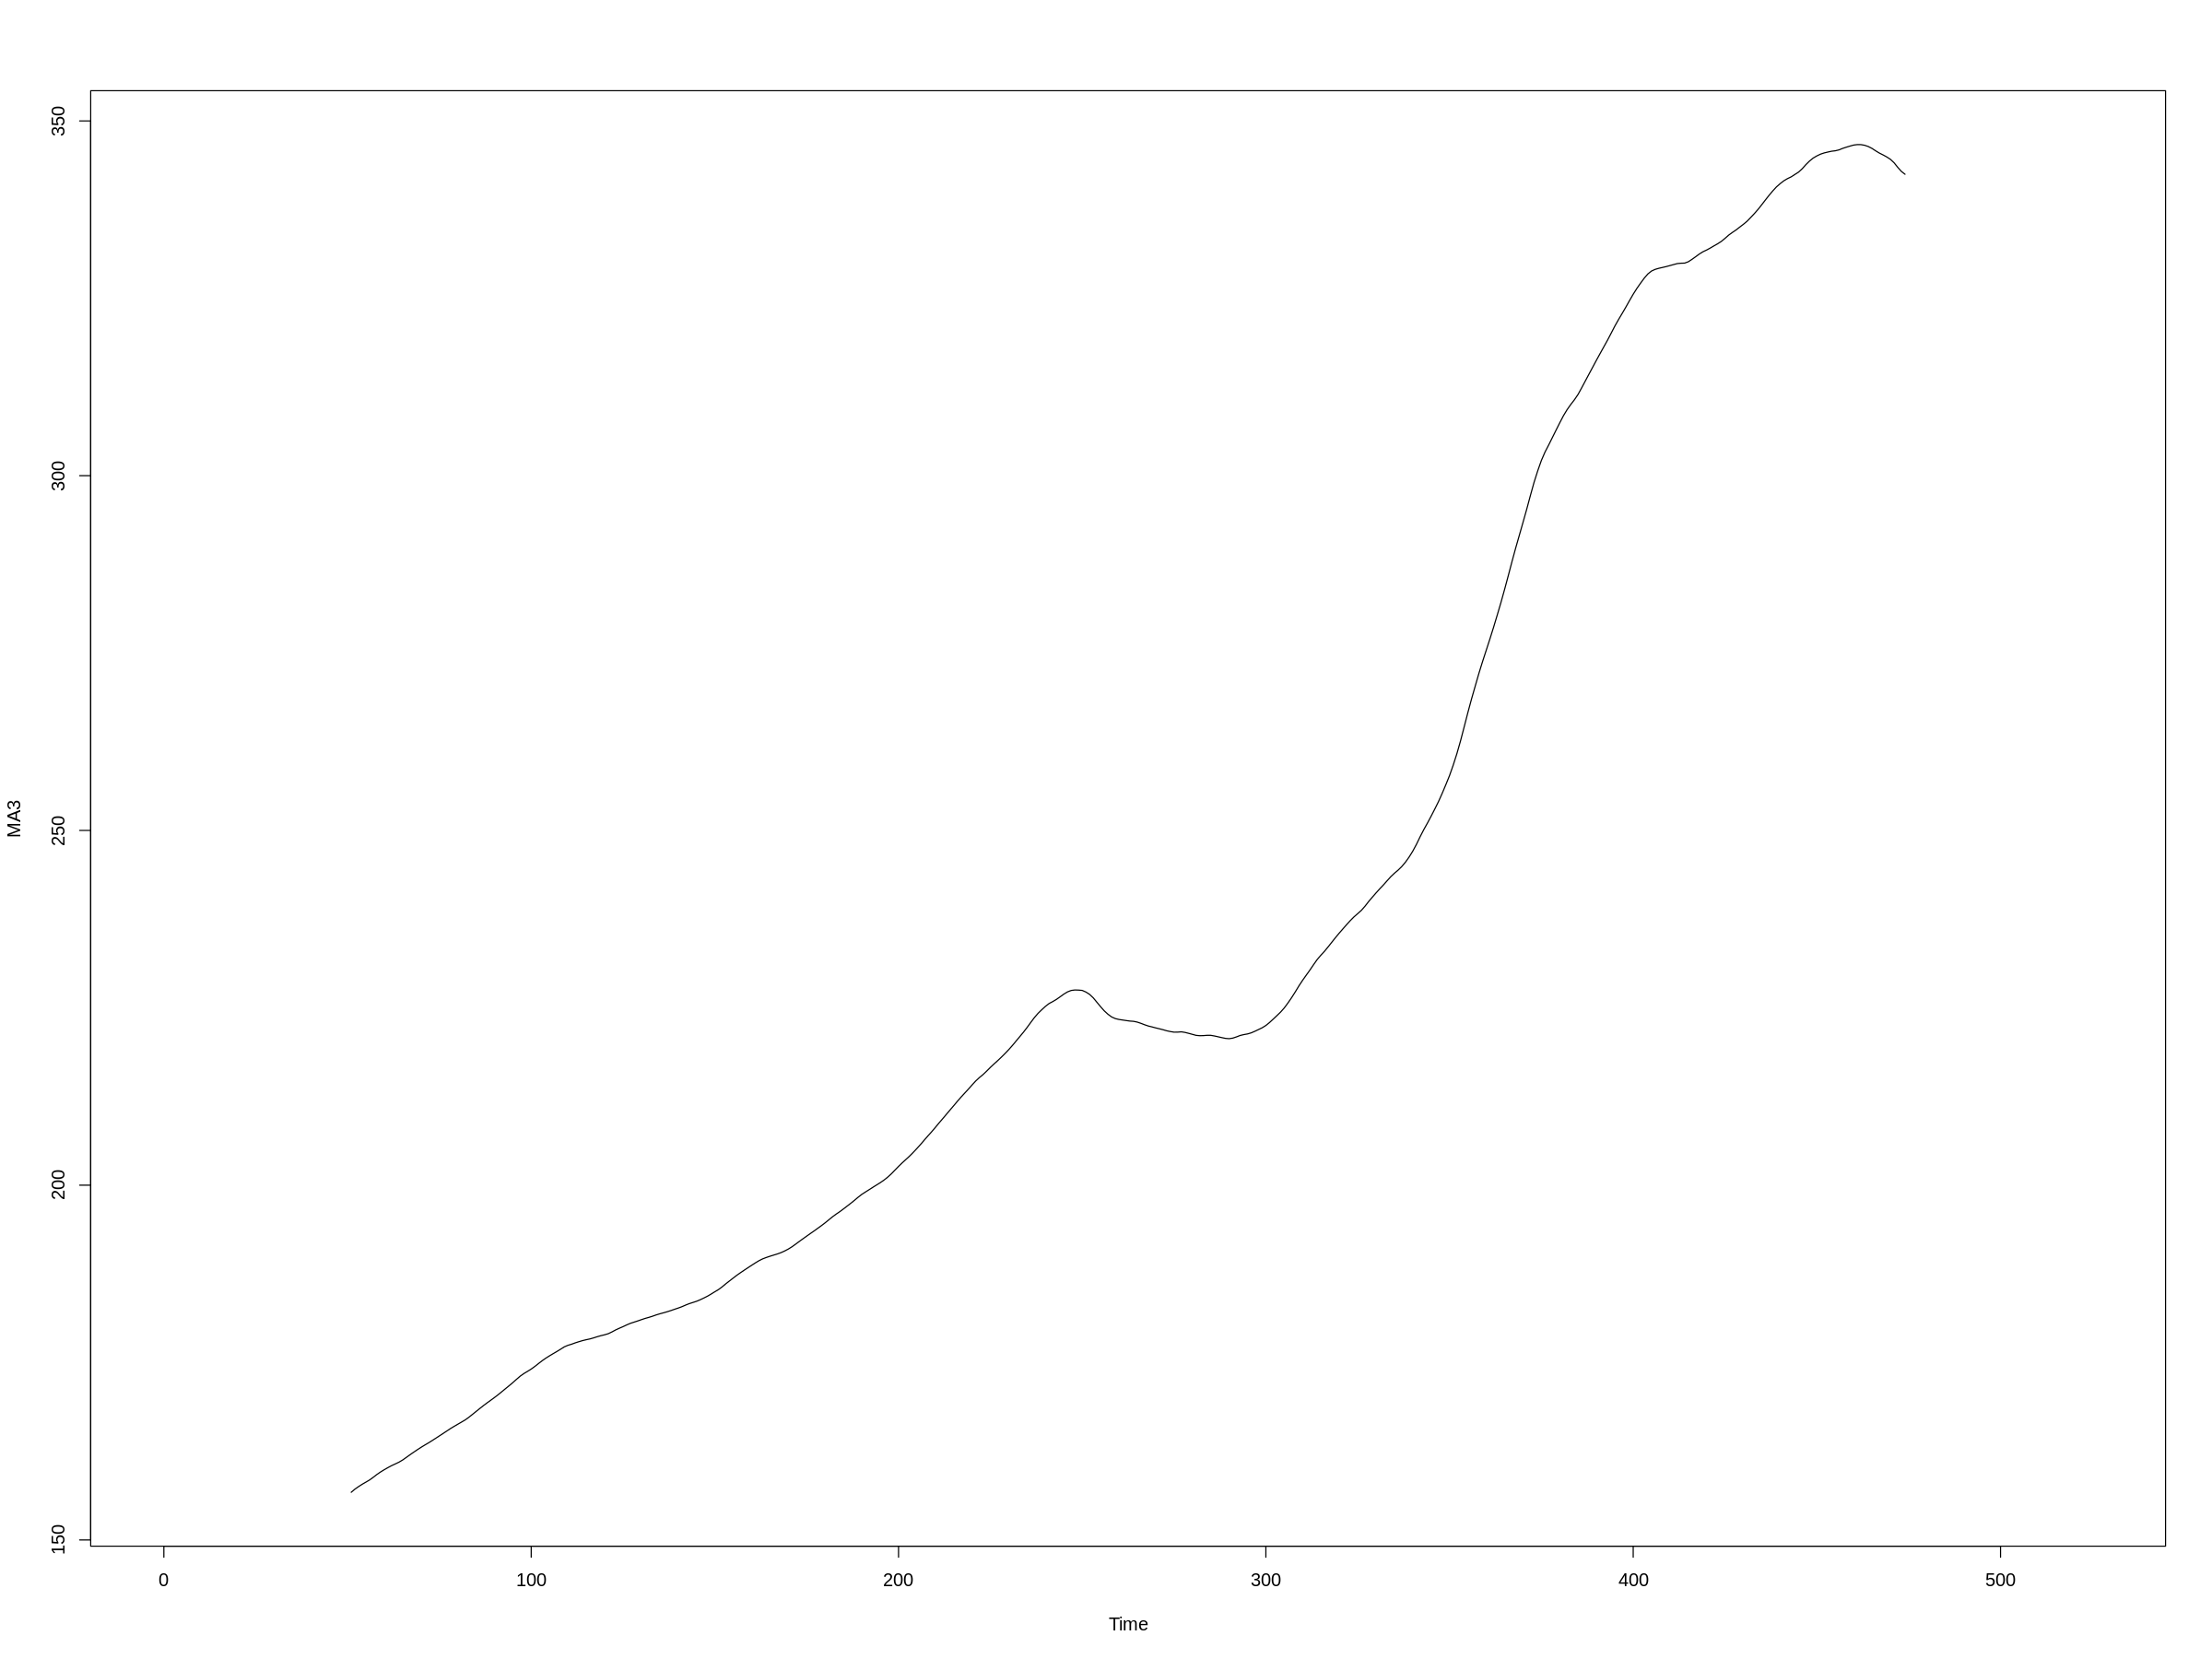

In [ ]:
plot(MA3)

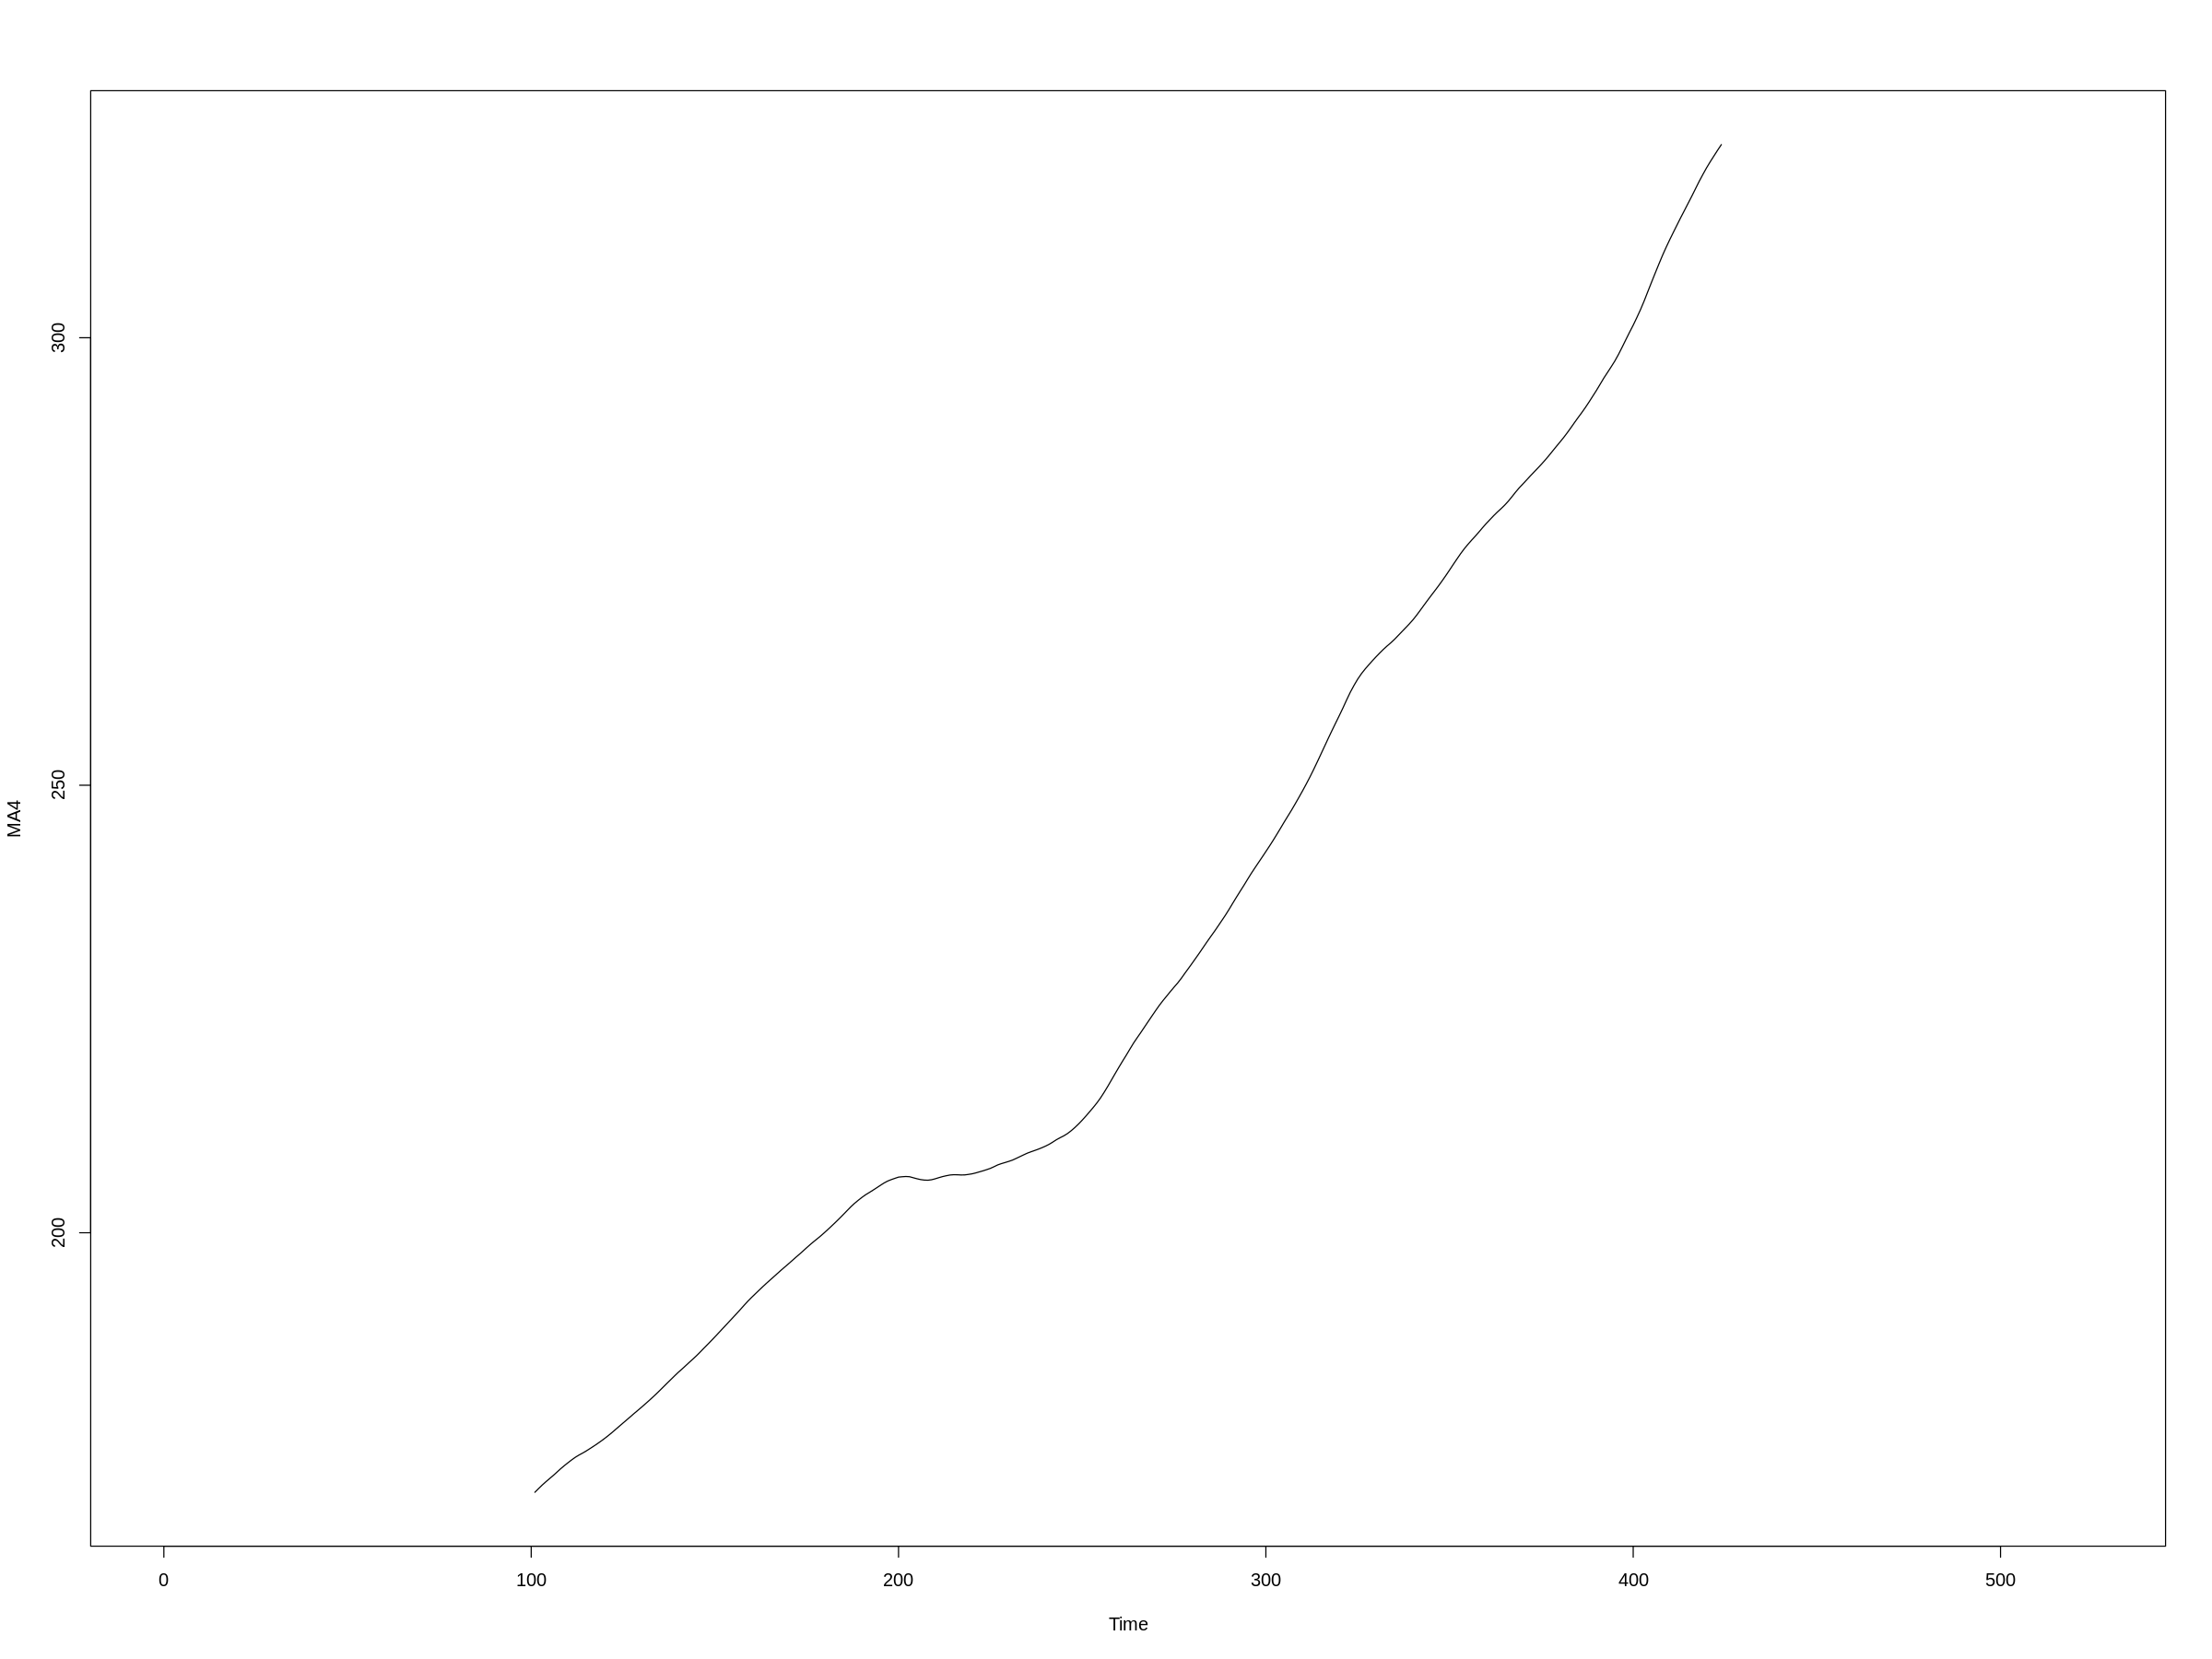

In [ ]:
plot(MA4)

In [ ]:
#Holt-Winters Forecasting 
holt <- holt(df,h=60)

In [ ]:
accuracy(holt)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.02097932,6.138975,4.198396,-0.04177813,1.769725,0.9965649,0.0393973


In [ ]:
summary(holt)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = df, h = 60) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 129.4316 
    b = 0.4007 

  sigma:  6.1625

     AIC     AICc      BIC 
5192.783 5192.899 5214.091 

Error measures:
                      ME     RMSE      MAE         MPE     MAPE      MASE
Training set -0.02097932 6.138975 4.198396 -0.04177813 1.769725 0.9965649
                  ACF1
Training set 0.0393973

Forecasts:
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
525       329.0798 321.1822 336.9774 317.0015 341.1582
526       329.4794 318.3106 340.6483 312.3982 346.5607
527       329.8790 316.1996 343.5584 308.9582 350.7999
528       330.2786 314.4824 346.0749 306.1203 354.4369
529       330.6782 313.0167 348.3398 303.6672 357.6892
530       331.0778 311.7297 350.4260 301.4874 360.6683
531       331.4774 310.5781 352.3768 299.5146 363.4403
532       331.8771 309.5336 354.2205 297.7057 36

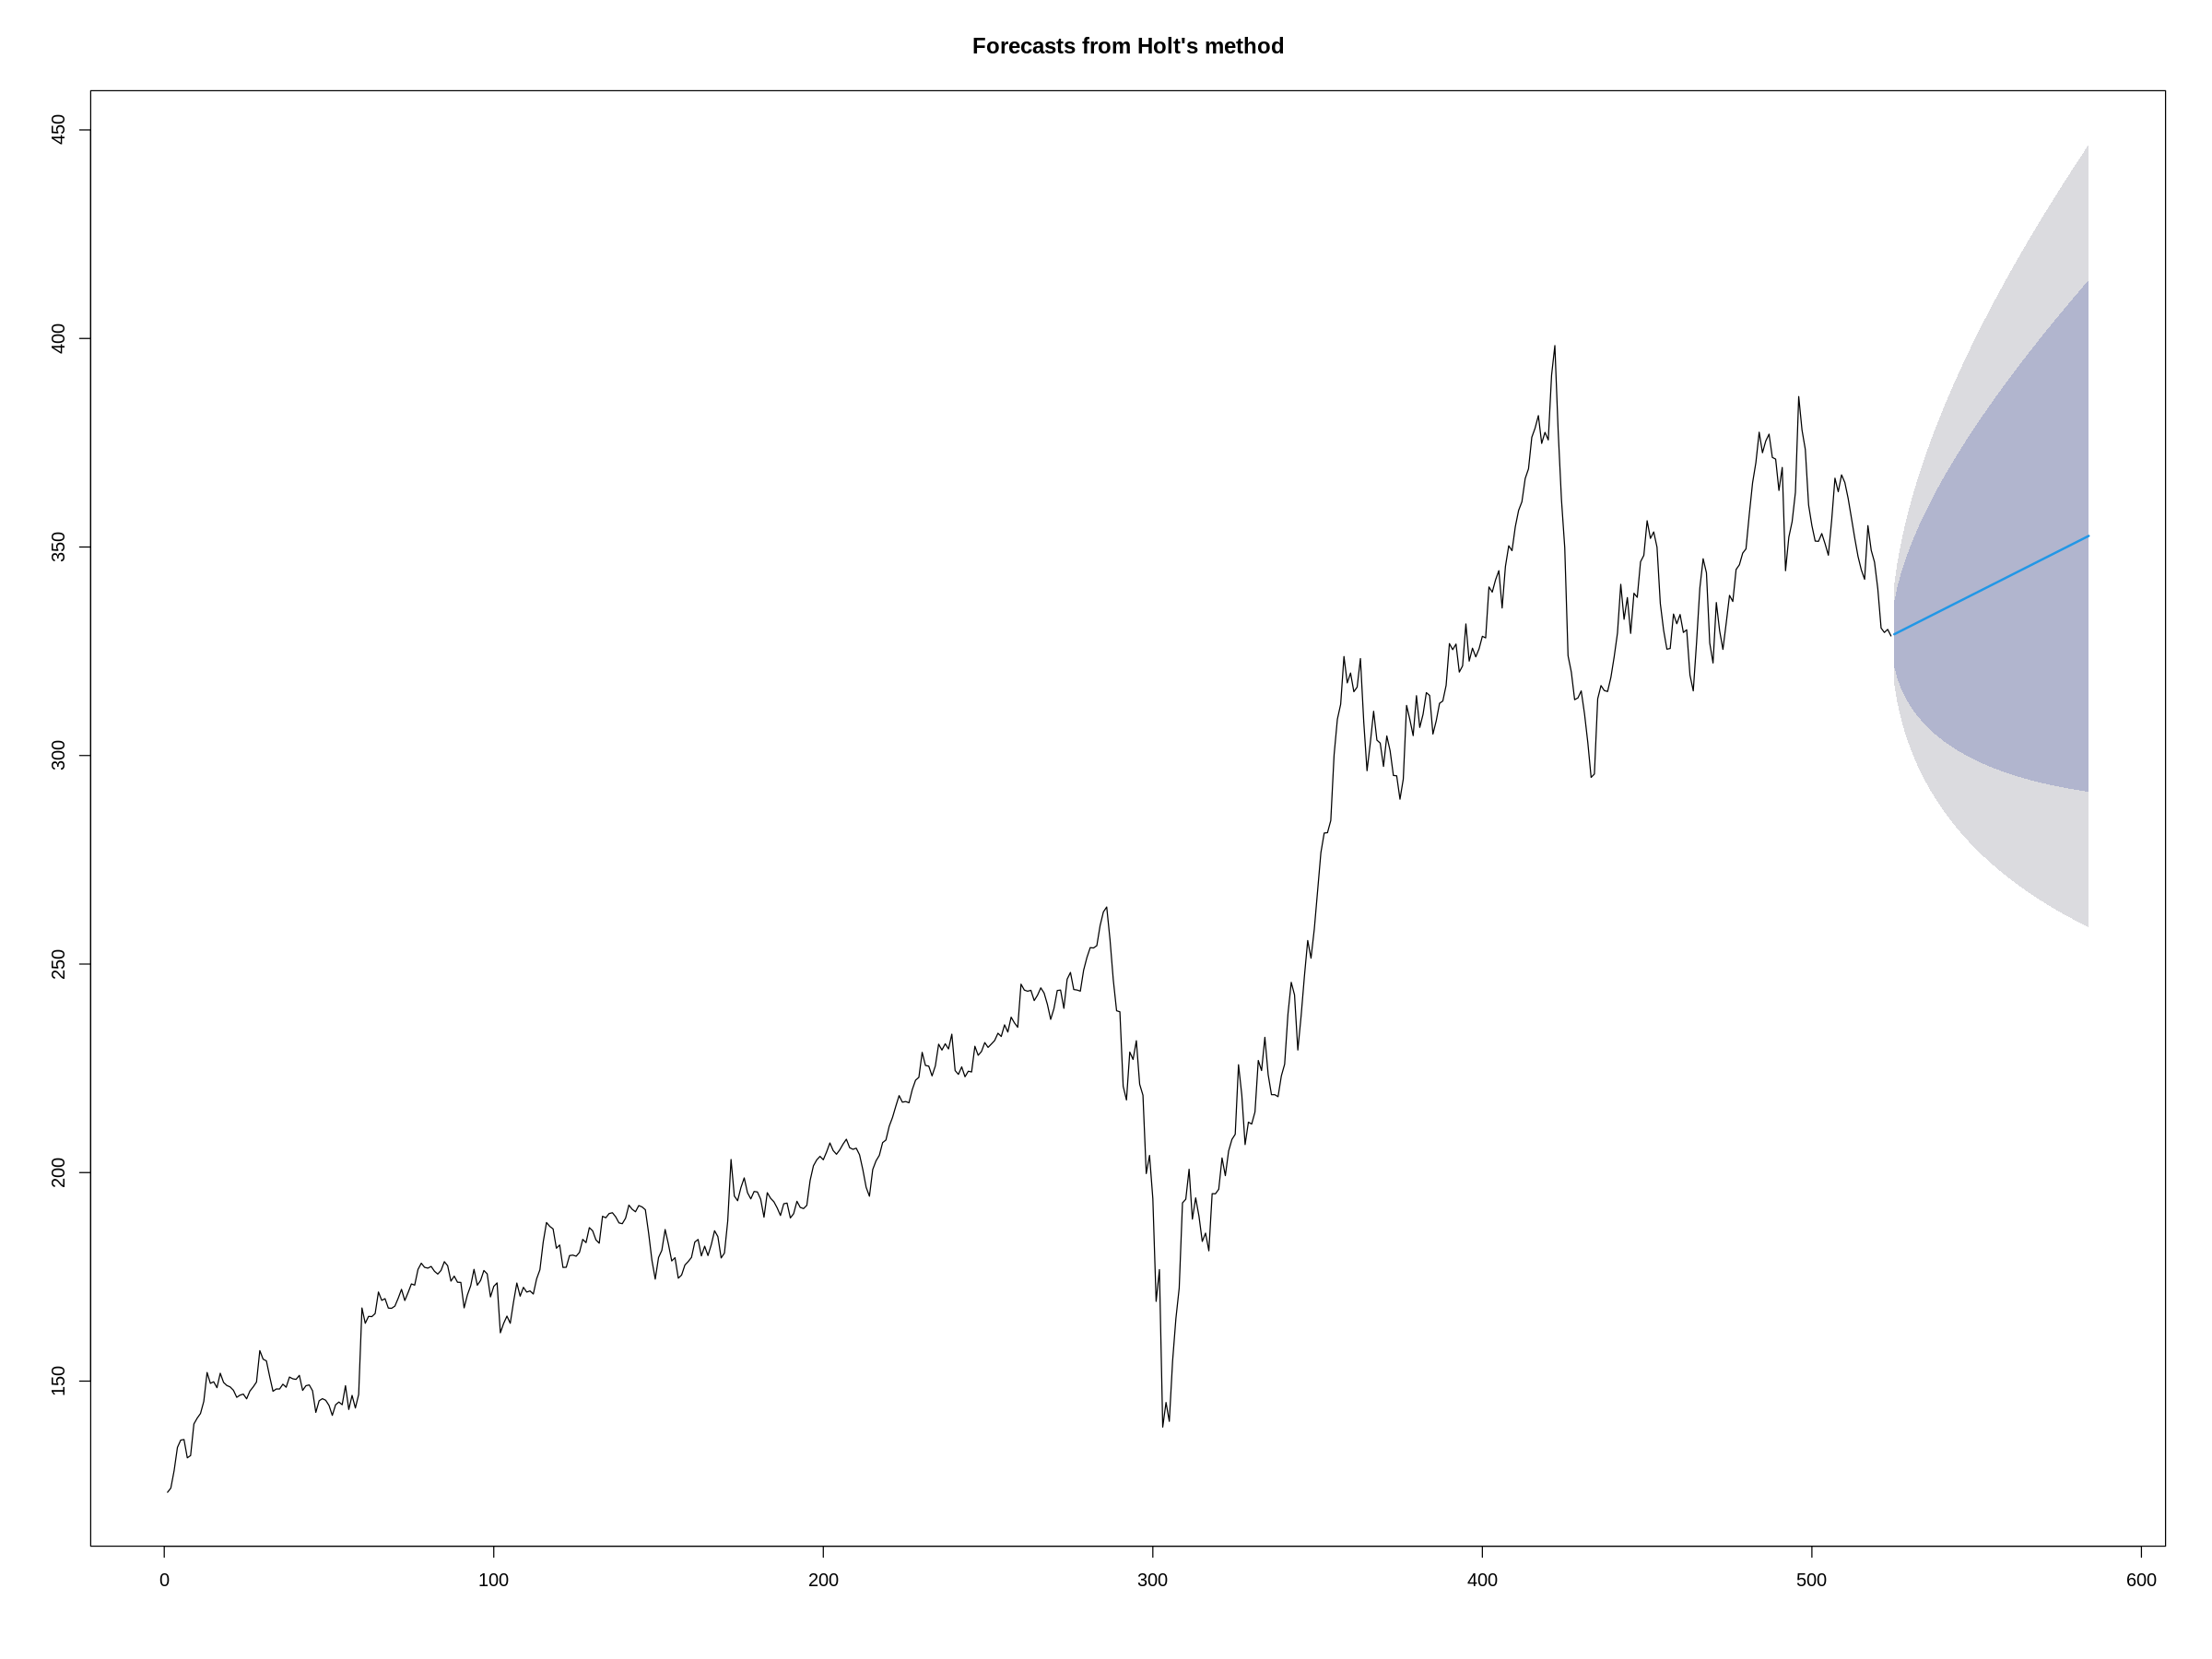

In [ ]:
plot(holt)

In [ ]:
#Auto Arima Forecasting
fitted.df <- auto.arima(df)
q <- forecast(fitted.df, h=60)

In [ ]:
accuracy(q)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.0002346514,6.132105,4.186248,-0.02782133,1.759836,0.9936814,0.03956342


In [ ]:
summary(q)


Forecast method: ARIMA(0,1,0) with drift

Model Information:
Series: df 
ARIMA(0,1,0) with drift 

Coefficients:
       drift
      0.3926
s.e.  0.2684

sigma^2 estimated as 37.75:  log likelihood=-1691.08
AIC=3386.17   AICc=3386.19   BIC=3394.69

Error measures:
                       ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.0002346514 6.132105 4.186248 -0.02782133 1.759836 0.9936814
                   ACF1
Training set 0.03956342

Forecasts:
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
525       329.0726 321.1989 336.9462 317.0309 341.1143
526       329.4652 318.3302 340.6002 312.4356 346.4947
527       329.8578 316.2202 343.4954 309.0009 350.7146
528       330.2504 314.5031 345.9977 306.1670 354.3338
529       330.6430 313.0370 348.2490 303.7169 357.5691
530       331.0356 311.7492 350.3220 301.5396 360.5316
531       331.4282 310.5965 352.2599 299.5688 363.2876
532       331.8208 309.5508 354.0908 297.7617 365.8799
533       332.2134 308.5924 35

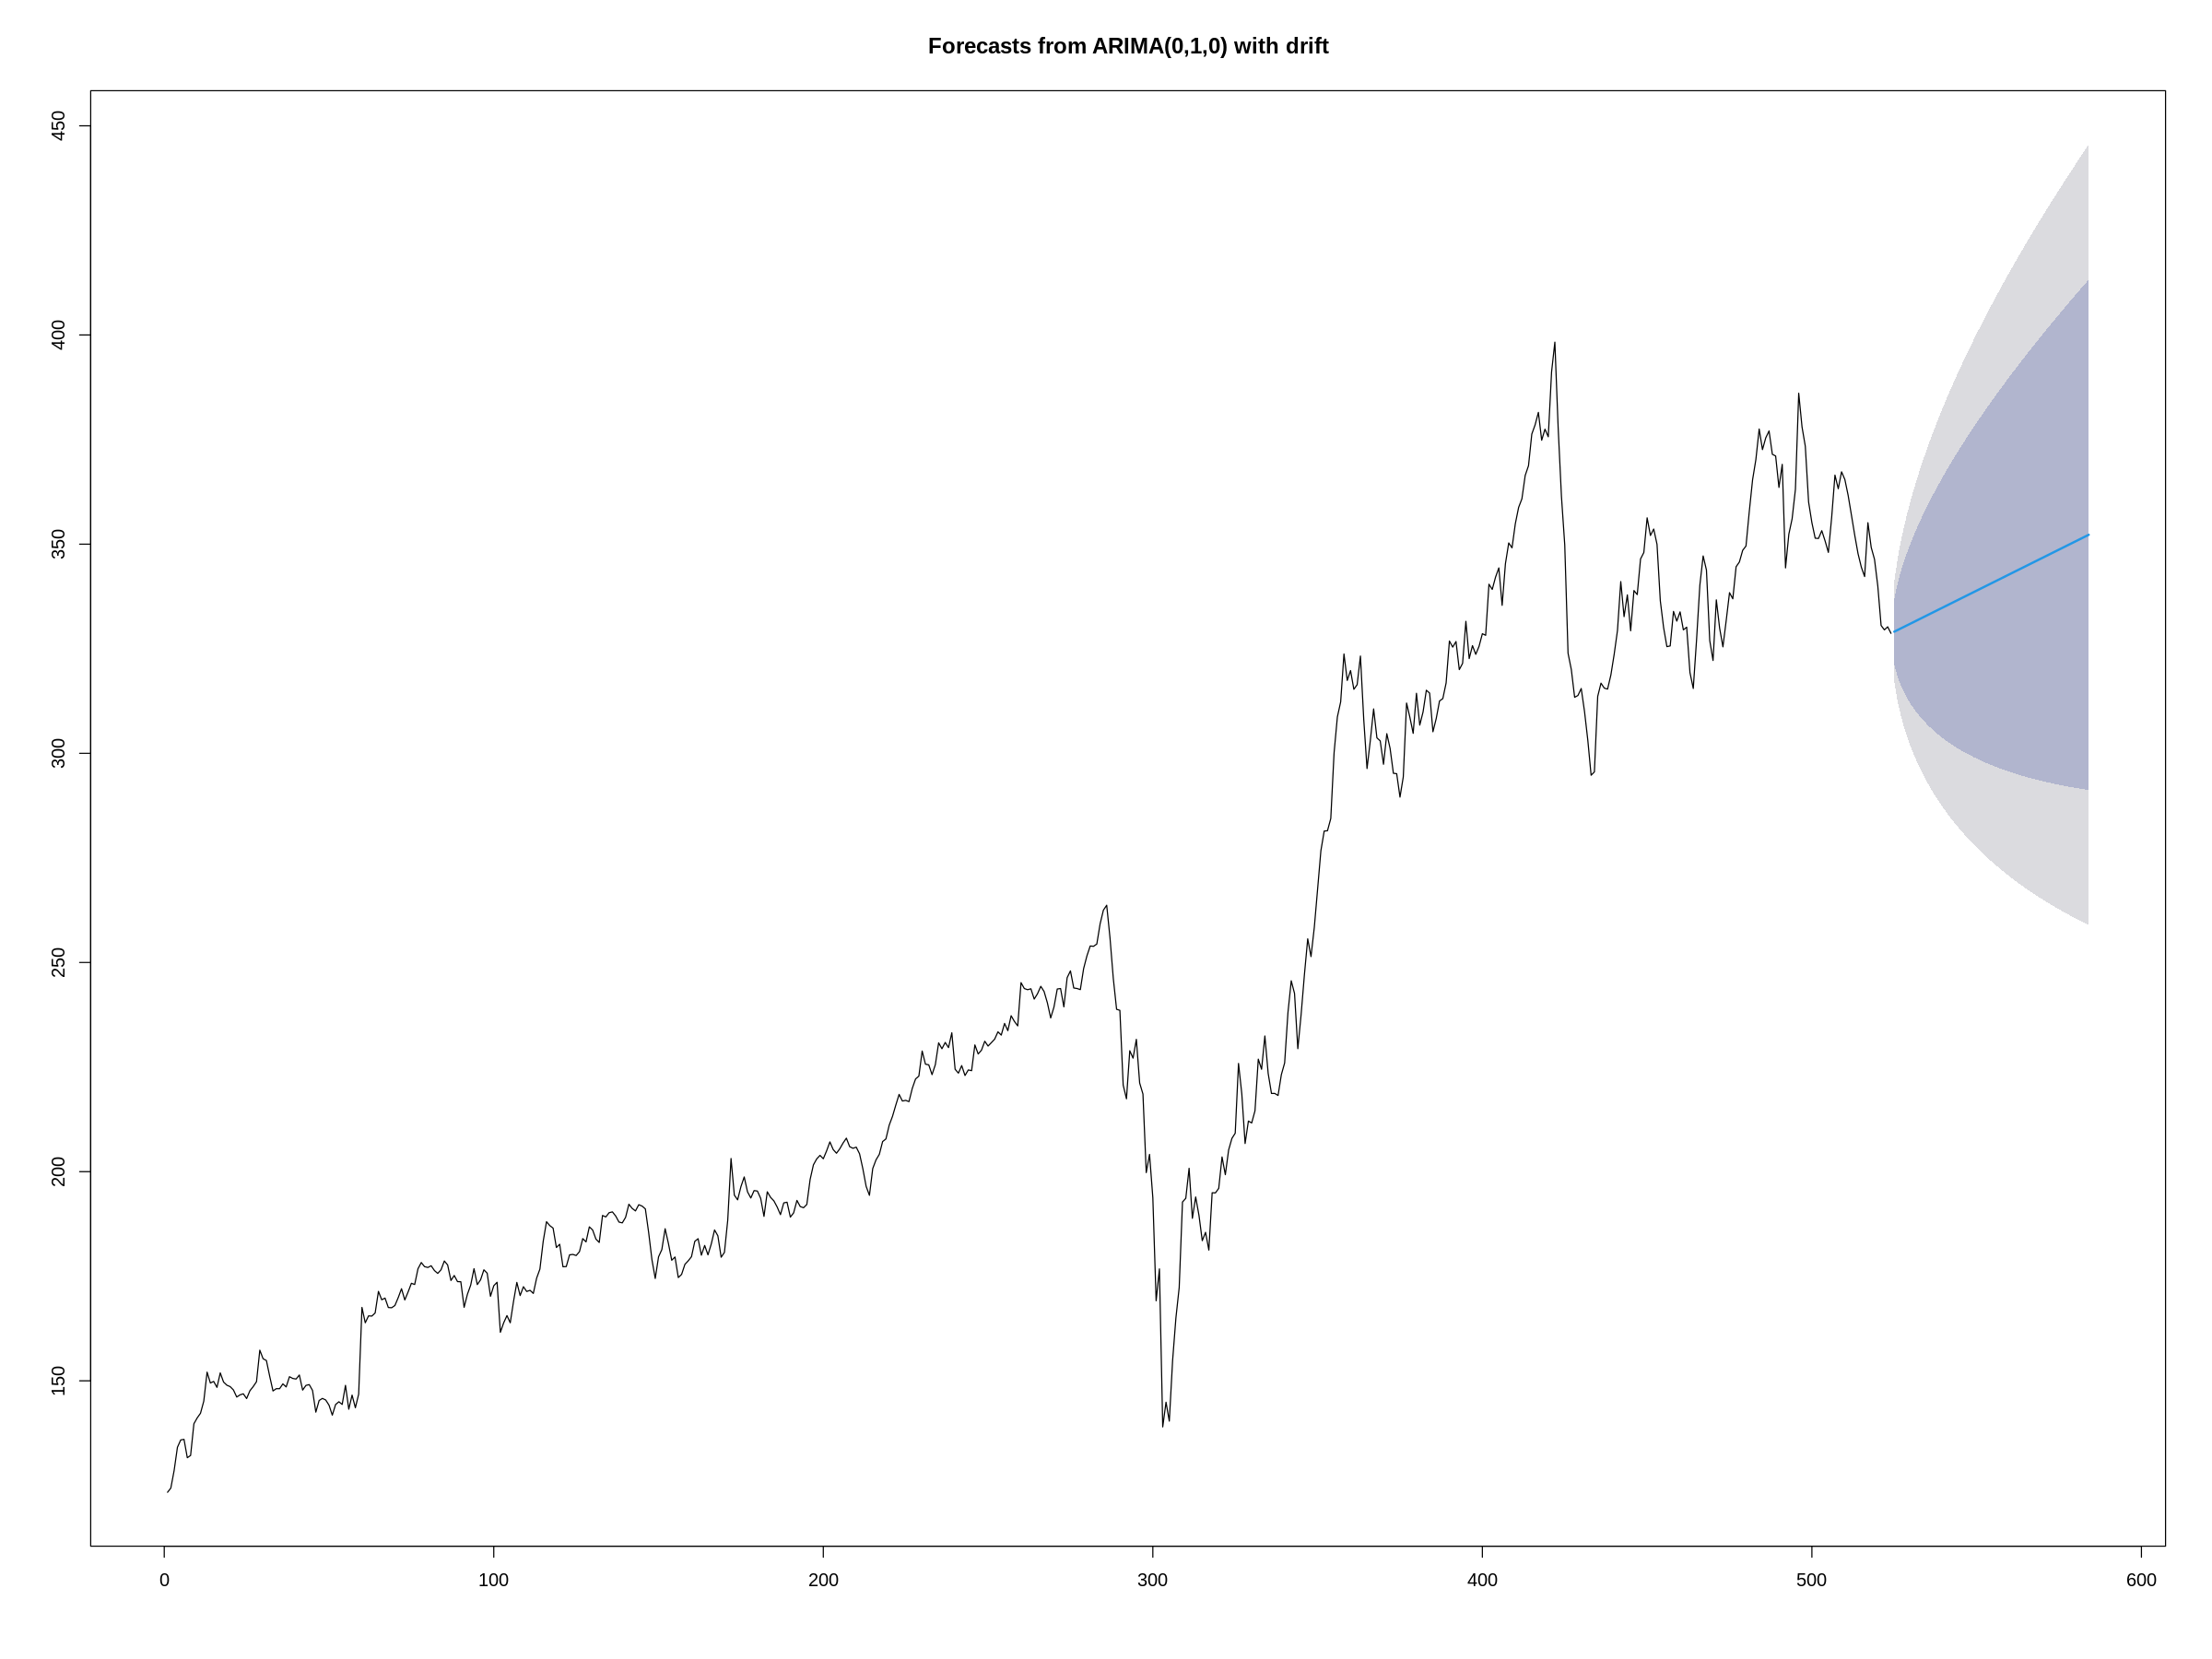

In [ ]:
plot(q)

In [ ]:
##### Back Test 1 #######################################
#Generate Simple Moving Averages
sma26 <- SMA(ticker, 26)
sma12 <- SMA(ticker, 12)
Data <- na.omit(as.data.frame(cbind(ticker, return, sma12, sma26)))

In [ ]:
print(Data)

           LULU.Adjusted        return      SMA    SMA.1
2019-02-07        147.63  0.0127477782 148.1900 142.0788
2019-02-08        148.62  0.0066835017 148.0875 143.0508
2019-02-11        149.79  0.0078415874 148.2008 144.0288
2019-02-12        157.32  0.0490477256 148.6533 145.1354
2019-02-13        155.27 -0.0131164293 149.1175 145.9496
2019-02-14        154.85 -0.0027086176 149.6092 146.6800
2019-02-15        151.09 -0.0245812859 149.8158 147.2604
2019-02-19        147.57 -0.0235729724 149.7958 147.8742
2019-02-20        148.12  0.0037200354 149.9625 148.4881
2019-02-21        148.11 -0.0000674746 150.0850 148.8104
2019-02-22        149.26  0.0077344705 150.2825 149.1231
2019-02-25        148.54 -0.0048354831 150.5142 149.3654
2019-02-26        150.98  0.0162931161 150.7933 149.5900
2019-02-27        150.56 -0.0027856887 150.9550 149.5319
2019-02-28        150.42 -0.0009302945 151.0075 149.5685
2019-03-01        151.38  0.0063618968 150.5125 149.6273
2019-03-04        147.78 -0.024

In [ ]:
colnames(Data) <- c("AAPPrices","return","SMA12","SMA26" )

In [ ]:
#Condition for trend following strategy
 
Data$UD <- ifelse(Data$SMA12 >= Data$SMA26, 1, 0)
class(Data$UD)

[1] "numeric"

In [ ]:
#Devise a trading strategy and Backtest
 
Data$Trade <- ifelse(Data$UD == 1, "BUY", "SELL")
Data$Position <- ifelse(Data$Trade == "BUY", 1, -1)
Data$AlgoRet <- Data$return * Data$Position
AnnualizedReturn <- ((mean(Data$AlgoRet)+1)^252 - 1)

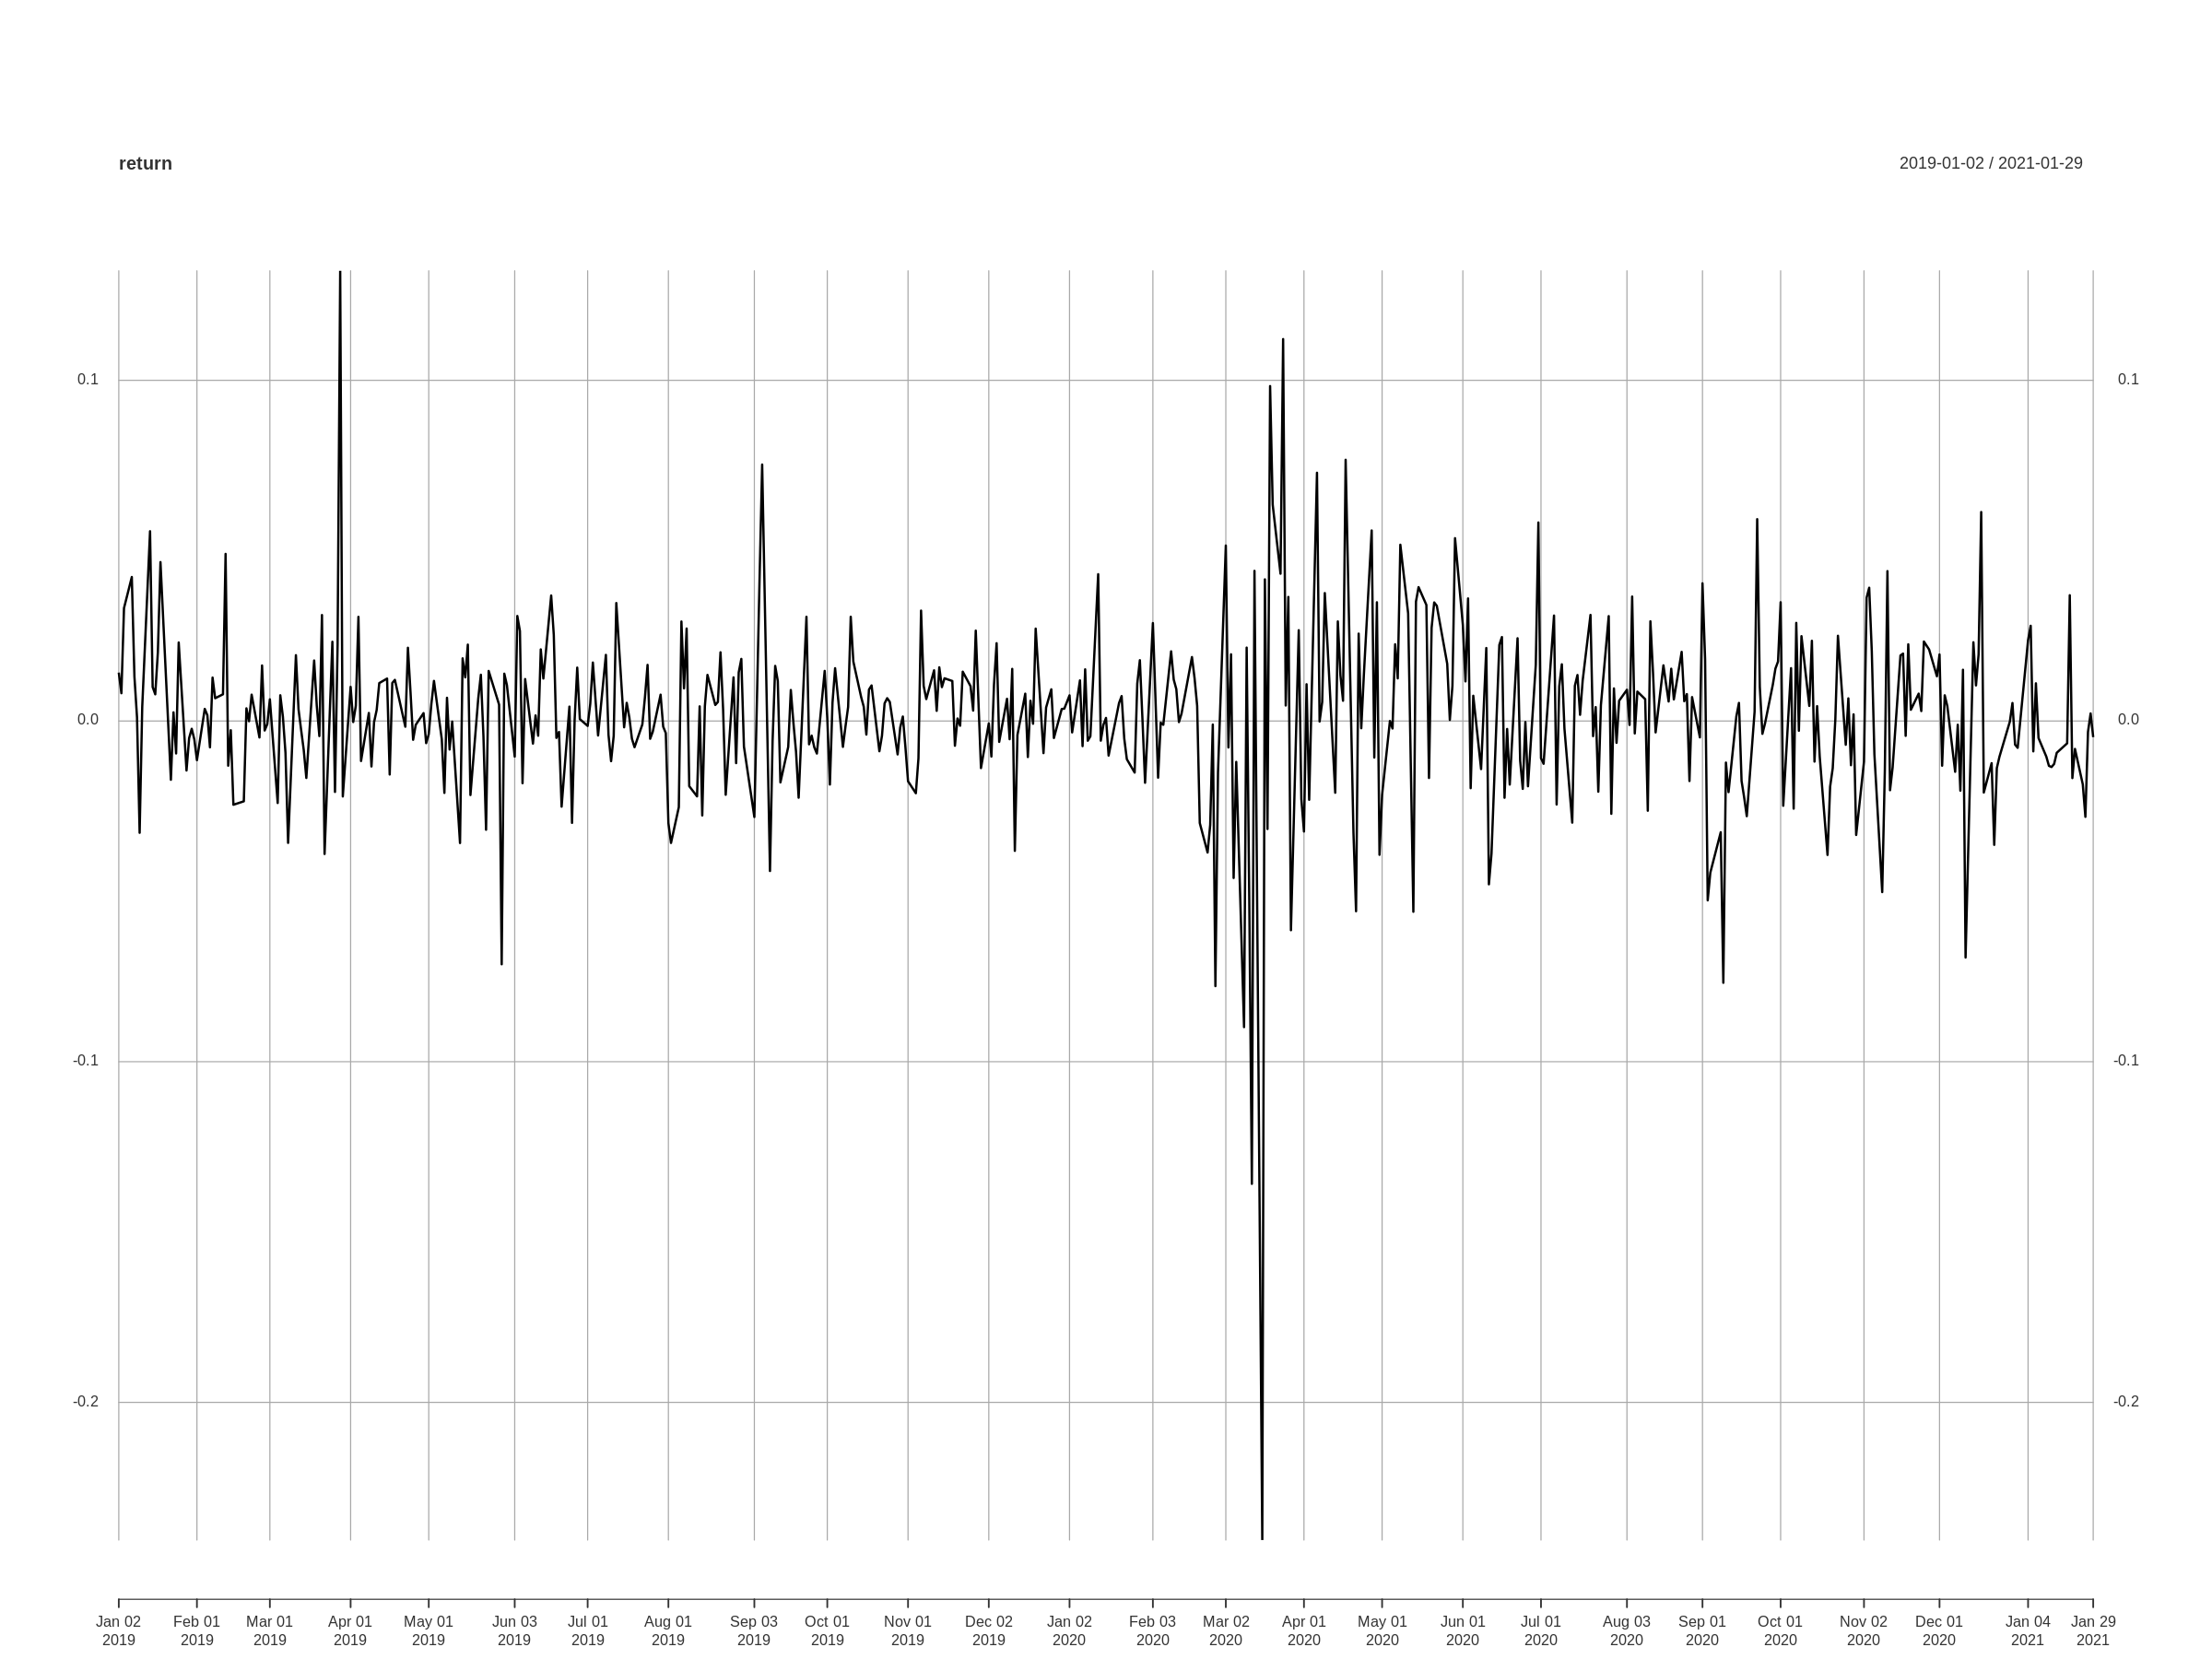

In [ ]:
plot(return)

In [ ]:
Standev <- sd(Data$AlgoRet)
rf <- 0.02
SharpeRatio <- (AnnualizedReturn - rf)/Standev

In [ ]:
#Print the results
print(paste("The trend-following algorithm was applied to the AAP Stock prices and was able to achieve an Annualized Return of", AnnualizedReturn,"%"))

[1] "The trend-following algorithm was applied to the AAP Stock prices and was able to achieve an Annualized Return of 0.30421201189627 %"


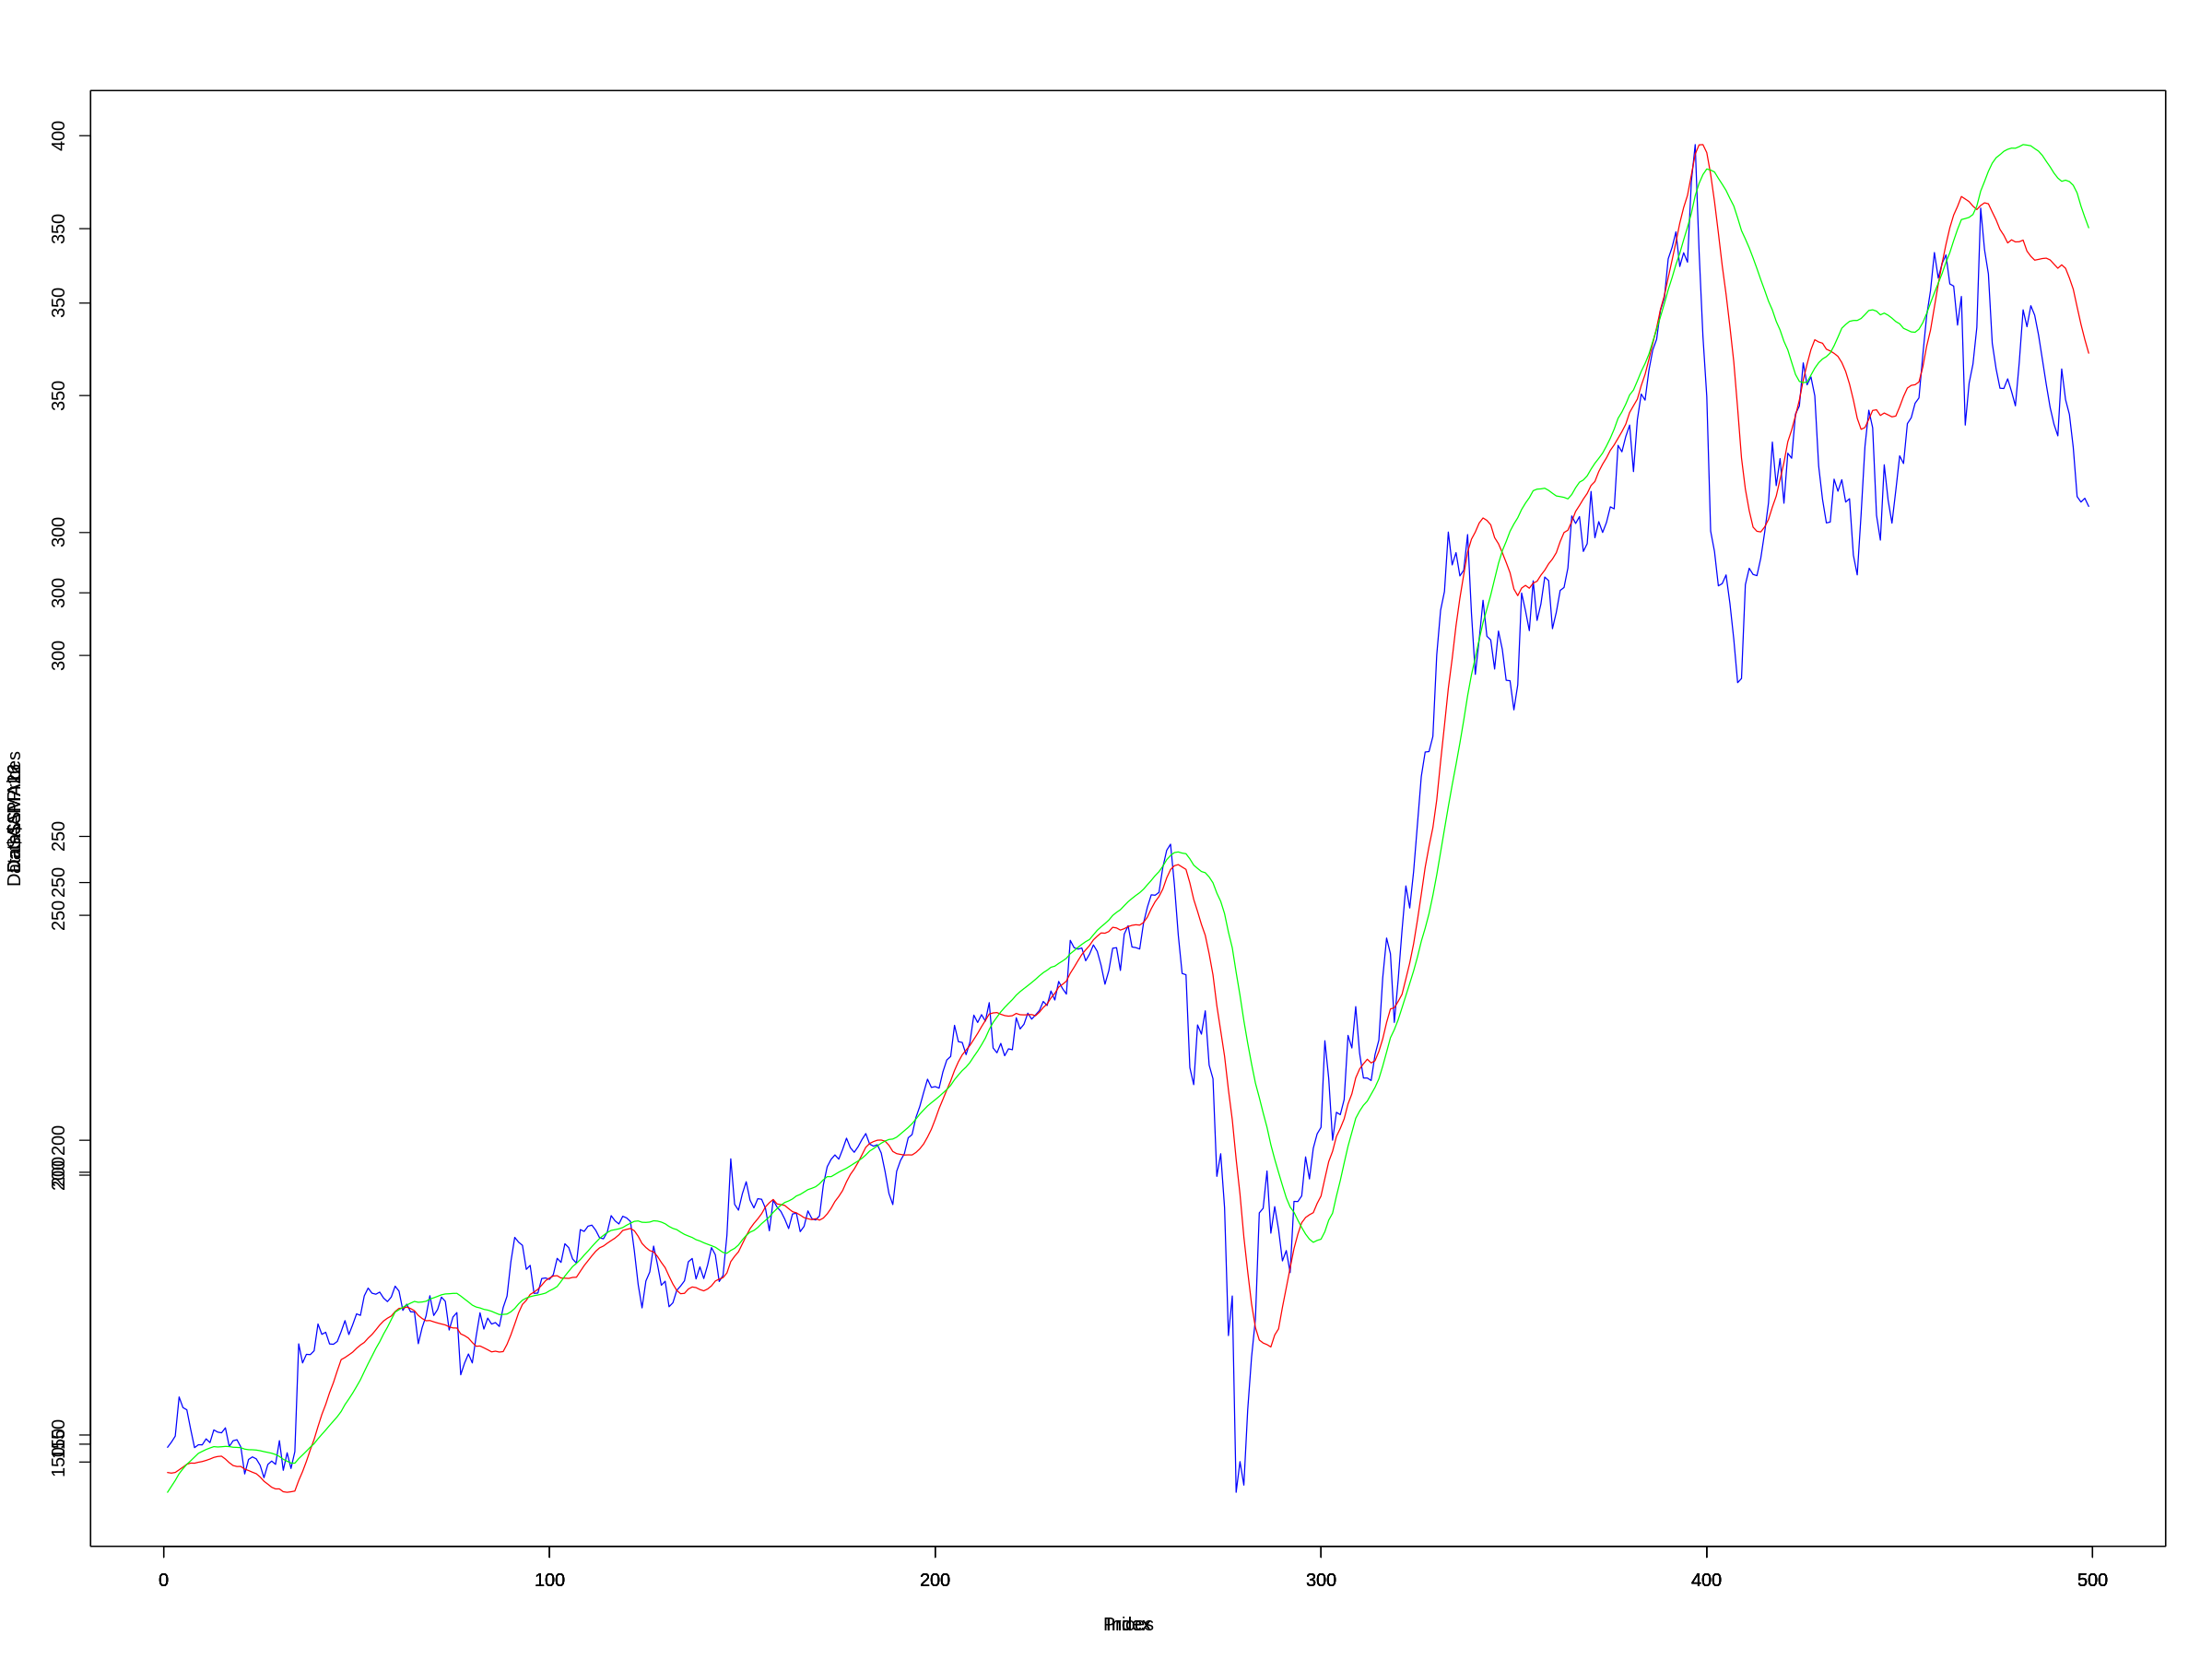

In [ ]:
#ppt
plot(Data$AAPPrices, type = "l", col = "blue", xlab = "Prices")
par(new = TRUE)
plot(Data$SMA12, type = "l" , col = "red")
par(new = TRUE)
plot(Data$SMA26, type = "l" , col = "green")

# **Assignment Code as a below**

**Eliminate blue line from existing plot**

integer(0)

integer(0)

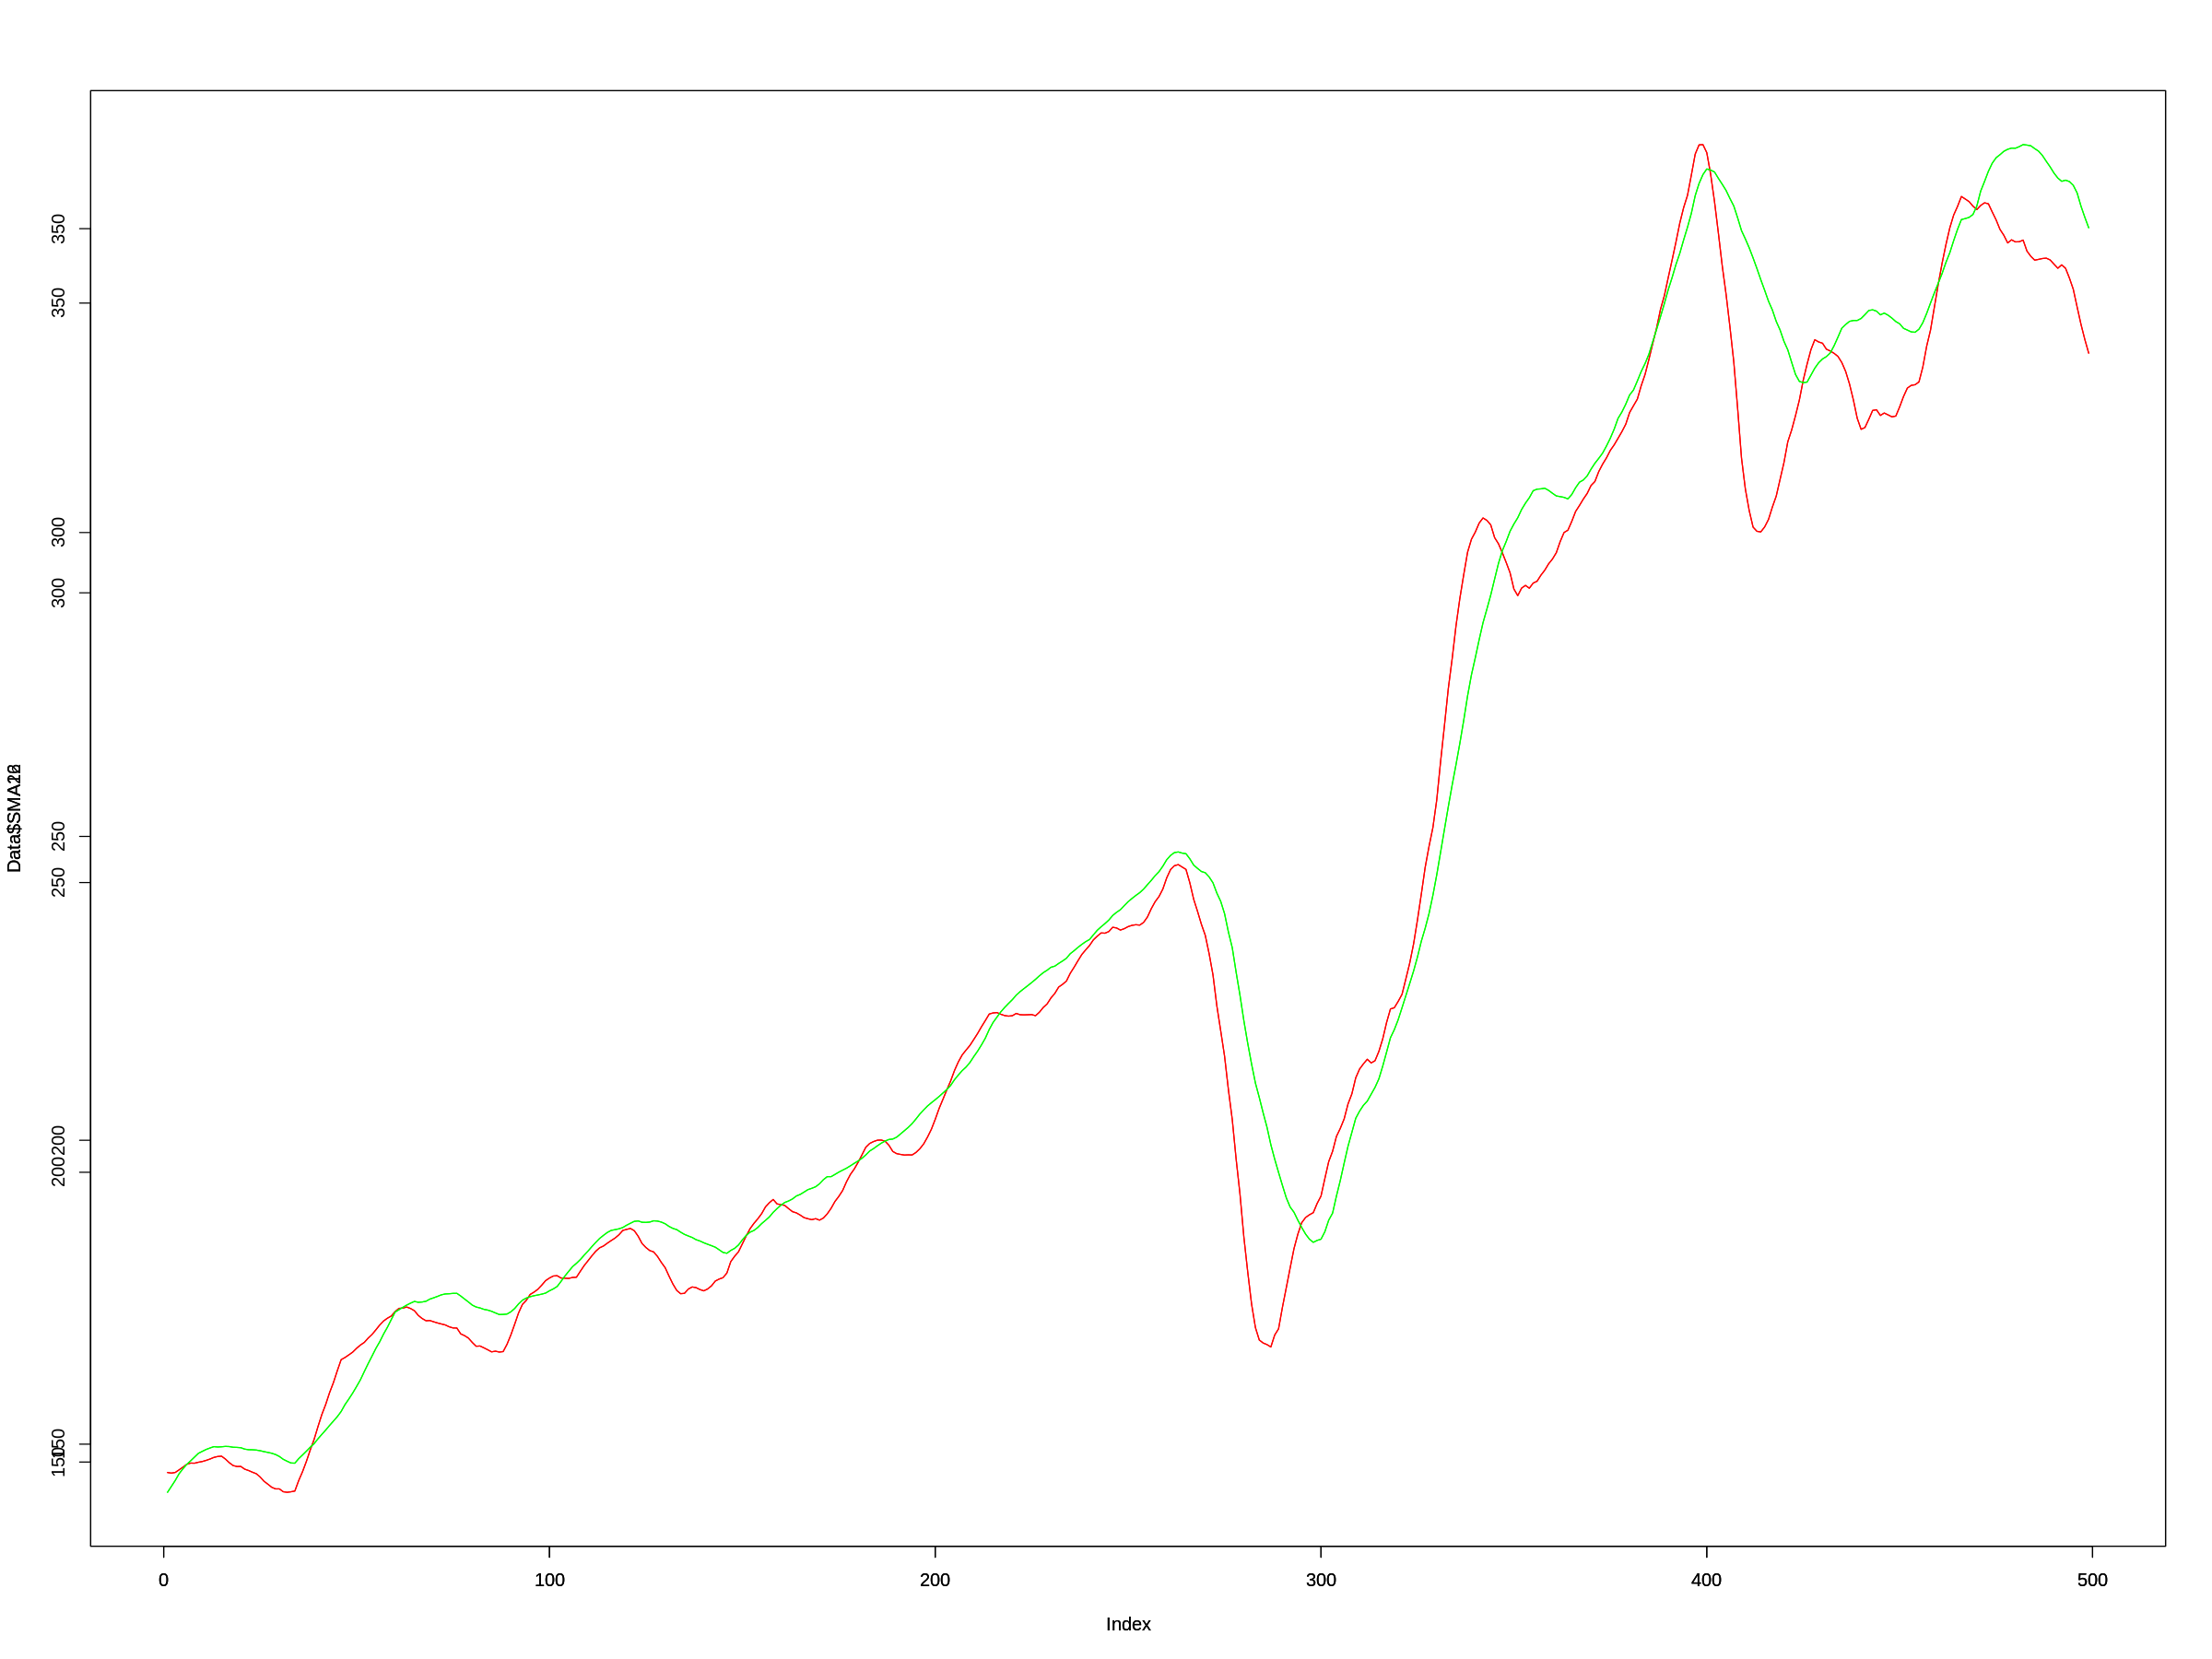

In [ ]:
#ppt
#plot(Data$AAPPrices, type = "l", col = "blue", xlab = "Prices")
#par(new = TRUE)
plot(Data$SMA12, type = "l" , col = "red")+lines(Data$SMA12, type = "l" , col = "red")
par(new = TRUE)
plot(Data$SMA26, type = "l" , col = "green")+lines(Data$SMA26, type = "l" , col = "green")

**Convert lines to scatter plot in order verify whether some points are not located on the intersections **

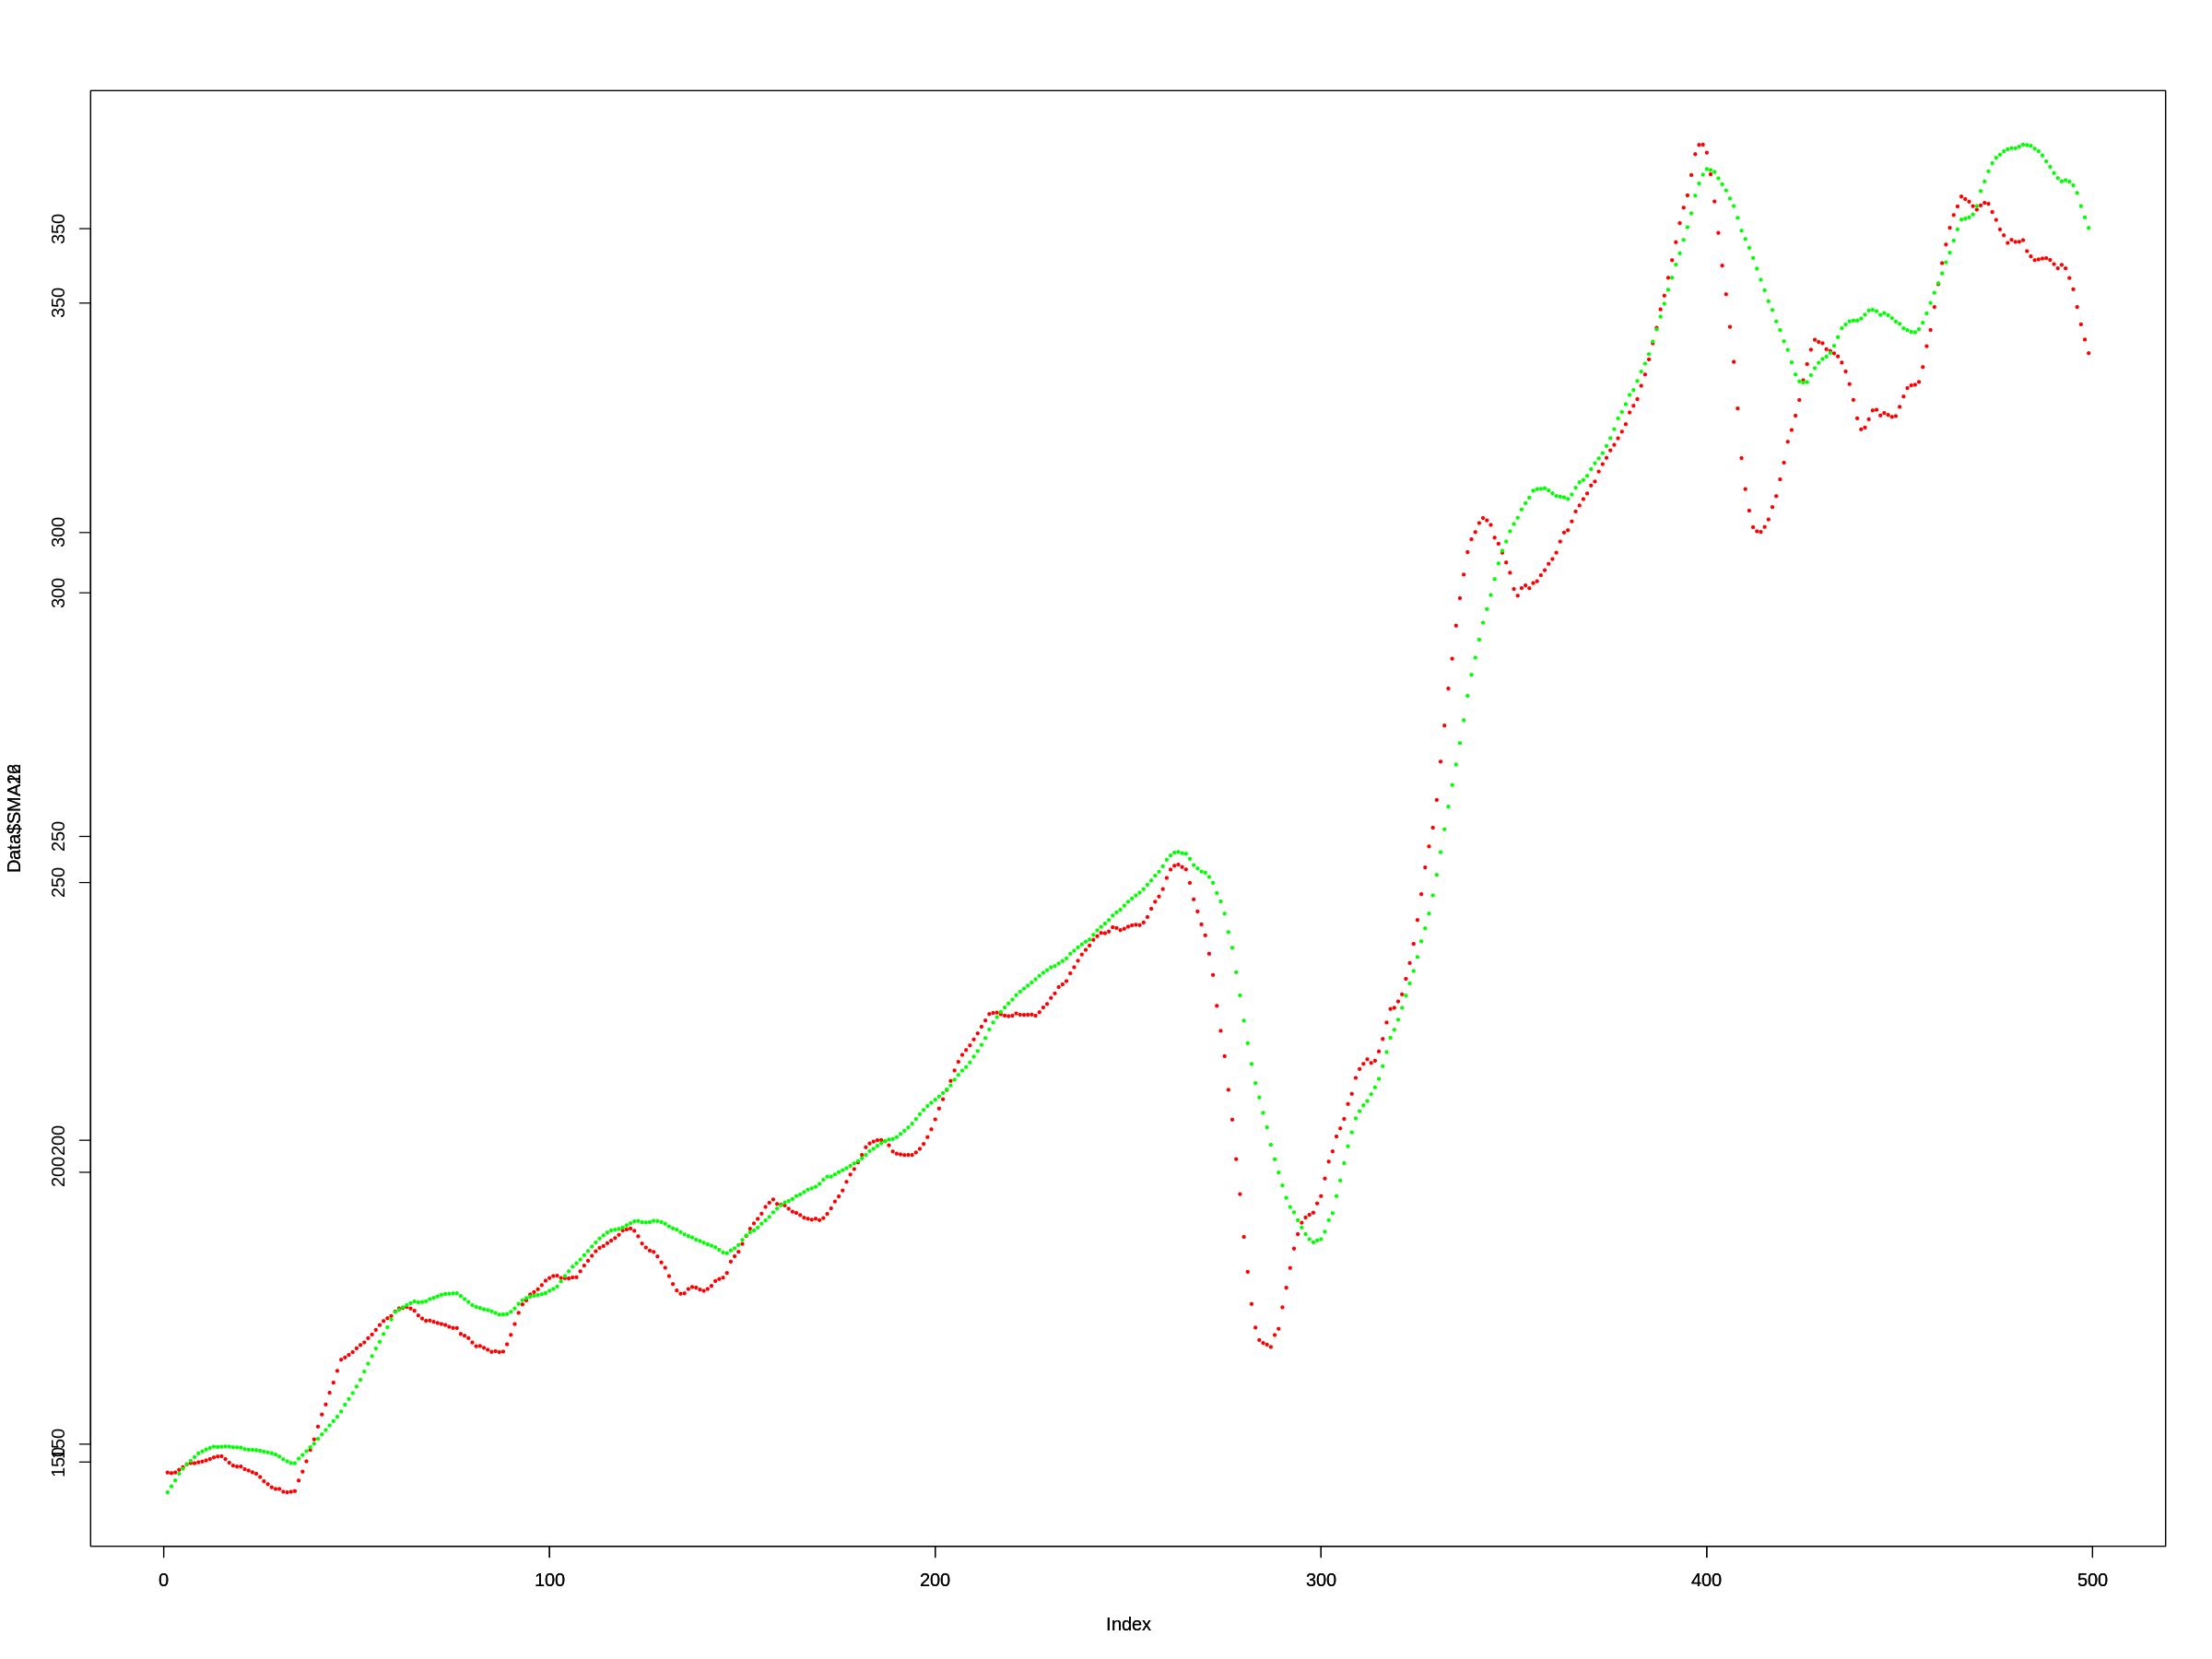

In [ ]:
#ppt
#plot(Data$AAPPrices, type = "l", col = "blue", xlab = "Prices")
#par(new = TRUE)
plot(Data$SMA12, col = "red", pch = 20,  cex=0.5)
par(new = TRUE)
plot(Data$SMA26, col = "green", pch = 20,  cex=0.5)

**Create additional functions**

In [ ]:
Show_Data_Length_Actual<-function(Sample_Data)
{	
	# Count Total Data
	return(length(Sample_Data))
}

Show_Data_Sample<-function(Sample_Data)
{	
	# Print Data
  return(Sample_Data)
}

Show_Index_Word<-function(DataSample)
{	
	# Print Results
  N = Show_Data_Length_Actual(DataSample)
  result <- vector("numeric", N) # prepare a container
  for(i in 1:N)
  {
    word_repetitive = "Index-"
    #print(grad_direction)
    result[i] = word_repetitive
  }
  return(result)
}

Show_Colapsed_Data<-function(Sample_Data01,Sample_Data02)
{	
	# Count Total Data
	for(i in 1:length(Sample_Data01))
	{
		cat("[",i,"]",Sample_Data01[i],",",Sample_Data02[i],"\n")
	}
}

Show_Colapsed_Data_Triple<-function(Starting,Finishing,Sample_Data01,Sample_Data02,Sample_Data03)
{	
	# Count Total Data
	for(i in Starting:Finishing)
	{
		cat("[",i,"]",Sample_Data01[i],",",Sample_Data02[i],",",Sample_Data03[i],"\n")
	}
}

Show_Colapsed_Data_Quadraple<-function(Starting,Finishing,Sample_Data01,Sample_Data02,Sample_Data03,Sample_Data04)
{	
	# Count Total Data
	for(i in Starting:Finishing)
	{
		cat("[",i,"]",Sample_Data01[i],",",Sample_Data02[i],",",Sample_Data03[i],",",Sample_Data04[i],"\n")
	}
}

**Functions below are essential to analyse the intersection points and decisions (BUY/SELL)**

In [ ]:
Show_Gradient<-function(SampleTarget,SampleData)
{	 
	# Print Results
    SampleTarget[SampleData+1] - SampleTarget[SampleData-1]
}

Show_Decision<-function(DataTarget,DataSample)
{	
	# Print Results
  N = Show_Data_Length_Actual(DataSample)
  result <- vector("numeric", N) # prepare a container
  for(i in 1:N)
  {
    #if((DataTarget[DataSample[i]+1] - DataTarget[DataSample[i]-1]) < 0)
    if(Show_Gradient(DataTarget,DataSample[i]) < 0)
    {
      grad_direction = "as SMA12 (red) crosses downward SMA26 (green) then apply decision to BUY"
    } 
    else 
    {
      grad_direction = "as SMA12 (red) crosses upward SMA26 (green) then apply decision to SELL"
    }
    #print(grad_direction)
    result[i] = grad_direction
  }
  return(result)
}

**Find the intersection points between SMA12 (red) and SMA26 (green)**

In [ ]:
set.seed(2)
above <- Data$SMA12 > Data$SMA26

intersect.points <- which(diff(above) != 0)
x_position_intercept = intersect.points

**Summary**

In [ ]:
N_Intercepts = Show_Data_Length_Actual(x_position_intercept)
String_Word_Index = Show_Index_Word(x_position_intercept)
Locate_Intercept_Index = Show_Data_Sample(x_position_intercept)
BUY_SELL_Decision = Show_Decision(Data$SMA12,x_position_intercept)

In [ ]:
Show_Colapsed_Data_Triple(1,N_Intercepts,String_Word_Index,Locate_Intercept_Index,BUY_SELL_Decision)

[ 1 ] Index- , 17 , as SMA12 (red) crosses downward SMA26 (green) then apply decision to BUY 
[ 2 ] Index- , 35 , as SMA12 (red) crosses upward SMA26 (green) then apply decision to SELL 
[ 3 ] Index- , 70 , as SMA12 (red) crosses downward SMA26 (green) then apply decision to BUY 
[ 4 ] Index- , 89 , as SMA12 (red) crosses upward SMA26 (green) then apply decision to SELL 
[ 5 ] Index- , 125 , as SMA12 (red) crosses downward SMA26 (green) then apply decision to BUY 
[ 6 ] Index- , 144 , as SMA12 (red) crosses upward SMA26 (green) then apply decision to SELL 
[ 7 ] Index- , 167 , as SMA12 (red) crosses downward SMA26 (green) then apply decision to BUY 
[ 8 ] Index- , 173 , as SMA12 (red) crosses upward SMA26 (green) then apply decision to SELL 
[ 9 ] Index- , 194 , as SMA12 (red) crosses upward SMA26 (green) then apply decision to SELL 
[ 10 ] Index- , 197 , as SMA12 (red) crosses upward SMA26 (green) then apply decision to SELL 
[ 11 ] Index- , 268 , as SMA12 (red) crosses downward SMA26